# GROUP 04 TT1L DATA SCIENCE FUNDAMENTAL

Below are the list of original datasets used in our project (pre-processed datasets):
1. yield.csv
2. pesticides.csv
3. temp.csv
4. Precipitation_1950-2014.xlsx
5. Precipitation_2015-2100.xlsx
6. Surface Air Temperature_1950-2014.xlsx
7. Surface Air Temp_2015-2100.xlsx
8. cereal-crop-yield-vs-fertilizer-application.csv
9. All Types of Crop Yield.csv

Below are the list of processed datasets used in our project:
1. average_annual_crop_yield.csv
2. cleaned_average_annual_crop_yield.csv
3. Q2filtered_cy.csv
4. Q2filtered_rf.csv
5. Q2filtered_temp.csv
6. Q2merged_rf_temp_crop data.csv
7. cleaned_fertilizer_data.csv
8. cleaned_pesticide_data.csv
9. merged_cleaned_dataset.csv
10. countries_climate_zone.csv
  
Trained Models are saved into the folder of 'models'


# Question 1 :What is the average annual crop yield of all various crop types for every country from 1990 to 2016?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# This line configures matplotlib to show figures embedded in the Jupyter notebook, 
# instead of opening a new window for each figure.
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('yield.csv', encoding='latin1')

In [5]:
df.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56717 entries, 0 to 56716
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Domain Code   56717 non-null  object
 1   Domain        56717 non-null  object
 2   Area Code     56717 non-null  int64 
 3   Area          56717 non-null  object
 4   Element Code  56717 non-null  int64 
 5   Element       56717 non-null  object
 6   Item Code     56717 non-null  int64 
 7   Item          56717 non-null  object
 8   Year Code     56717 non-null  int64 
 9   Year          56717 non-null  int64 
 10  Unit          56717 non-null  object
 11  Value         56717 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 5.2+ MB


In [7]:
# Filter the data for the years 1990 to 2016
filtered_data = df[(df['Year'] >= 1990) & (df['Year'] <= 2016)]

In [8]:
# Group the data by 'Area' (country) and 'Year'
grouped_data = filtered_data.groupby(['Area', 'Year'])

In [9]:
# Calculate the average yield for each group
average_yield = grouped_data['Value'].mean().reset_index()

In [10]:
# Rename the columns for clarity
average_yield.columns = ['Country', 'Year', 'Average Yield']

In [11]:
# Pivot the table to have years as columns and countries as rows
pivot_table = average_yield.pivot(index='Country', columns='Year', values='Average Yield')

In [12]:
print(pivot_table)

Year                                1990          1991       1992  \
Country                                                             
Afghanistan                 53885.500000  53198.750000  52280.750   
Albania                     29385.000000  28142.500000  30073.000   
Algeria                     29264.400000  34360.800000  41083.400   
American Samoa              31504.000000  53388.000000  53003.500   
Angola                      31793.666667  30884.833333  32196.500   
...                                  ...           ...        ...   
Wallis and Futuna Islands  102082.500000  97985.500000  98492.500   
Yemen                       48331.200000  50817.800000  55205.000   
Yugoslav SFR                36561.166667  45839.666667        NaN   
Zambia                      35873.250000  35487.750000  30535.125   
Zimbabwe                    43346.250000  42415.500000  38590.375   

Year                               1993          1994        1995  \
Country                          

In [13]:
pivot_table.to_csv('average_annual_crop_yield.csv')

In [14]:
average_yield = pd.read_csv('average_annual_crop_yield.csv', index_col='Country')

In [15]:
# Display the first few rows of the DataFrame
print(average_yield.head())

# Check for NaN values
print(average_yield.isna().sum())


                        1990          1991      1992          1993  \
Country                                                              
Afghanistan     53885.500000  53198.750000  52280.75  52763.000000   
Albania         29385.000000  28142.500000  30073.00  40478.200000   
Algeria         29264.400000  34360.800000  41083.40  40984.600000   
American Samoa  31504.000000  53388.000000  53003.50  52619.000000   
Angola          31793.666667  30884.833333  32196.50  36648.833333   

                        1994      1995          1996          1997      1998  \
Country                                                                        
Afghanistan     52964.750000  54145.25  53360.500000  54460.750000  55580.25   
Albania         34981.000000  45779.25  43990.750000  45755.000000  50748.00   
Algeria         32240.750000  38814.40  39496.800000  45095.000000  45165.00   
American Samoa  52234.500000  51850.00  51851.000000  64035.000000  73055.00   
Angola          42166.833333 

In [16]:
# Remove rows with any NaN values
cleaned_data = average_yield.dropna()

In [17]:
# Save the cleaned DataFrame to a new CSV file
cleaned_data.to_csv('cleaned_average_annual_crop_yield.csv')

In [18]:
# Load the cleaned pivot table CSV file into a DataFrame
cleaned_data = pd.read_csv('cleaned_average_annual_crop_yield.csv', index_col='Country')

In [19]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172 entries, Afghanistan to Zimbabwe
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1990    172 non-null    float64
 1   1991    172 non-null    float64
 2   1992    172 non-null    float64
 3   1993    172 non-null    float64
 4   1994    172 non-null    float64
 5   1995    172 non-null    float64
 6   1996    172 non-null    float64
 7   1997    172 non-null    float64
 8   1998    172 non-null    float64
 9   1999    172 non-null    float64
 10  2000    172 non-null    float64
 11  2001    172 non-null    float64
 12  2002    172 non-null    float64
 13  2003    172 non-null    float64
 14  2004    172 non-null    float64
 15  2005    172 non-null    float64
 16  2006    172 non-null    float64
 17  2007    172 non-null    float64
 18  2008    172 non-null    float64
 19  2009    172 non-null    float64
 20  2010    172 non-null    float64
 21  2011    172 non-null    float

In [20]:
cleaned_data.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,53885.500000,53198.750000,52280.75,52763.000000,52964.750000,54145.25,53360.500000,54460.750000,55580.25,53796.500000,...,56832.75,52687.75,53336.25,47002.000,40894.75,44001.00,49790.00,51395.5,49829.750,47537.75
Albania,29385.000000,28142.500000,30073.00,40478.200000,34981.000000,45779.25,43990.750000,45755.000000,50748.00,55392.500000,...,72782.50,76011.50,83092.25,88618.250,90725.00,93064.25,95233.75,94000.0,94170.500,93730.75
Algeria,29264.400000,34360.800000,41083.40,40984.600000,32240.750000,38814.40,39496.800000,45095.000000,45165.00,45512.000000,...,84145.60,73576.60,80542.40,71356.400,89933.20,114036.00,86749.00,83988.6,97849.800,128306.80
American Samoa,31504.000000,53388.000000,53003.50,52619.000000,52234.500000,51850.00,51851.000000,64035.000000,73055.00,52083.500000,...,44822.00,46109.00,45828.50,45619.500,45510.50,46571.50,47941.50,46569.0,45768.500,46623.50
Angola,31793.666667,30884.833333,32196.50,36648.833333,42166.833333,39810.50,40293.833333,38723.666667,39874.50,39211.666667,...,33441.00,41392.50,41789.25,42324.625,39548.75,31472.25,39410.25,39952.0,40306.875,38487.75


In [21]:
# Convert the DataFrame index to a list
countries = cleaned_data.index.tolist()

# Print the list of countries
for country in countries:
    print(country)

Afghanistan
Albania
Algeria
American Samoa
Angola
Antigua and Barbuda
Argentina
Australia
Austria
Bahamas
Bahrain
Bangladesh
Barbados
Belize
Benin
Bermuda
Bhutan
Bolivia (Plurinational State of)
Botswana
Brazil
Brunei Darussalam
Bulgaria
Burkina Faso
Burundi
Cabo Verde
Cambodia
Cameroon
Canada
Cayman Islands
Central African Republic
Chad
Chile
China
China, Hong Kong SAR
China, Taiwan Province of
China, mainland
Colombia
Comoros
Congo
Cook Islands
Costa Rica
Cuba
Cyprus
CÃ´te d'Ivoire
Democratic People's Republic of Korea
Democratic Republic of the Congo
Denmark
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eswatini
Faroe Islands
Fiji
Finland
France
French Guiana
French Polynesia
Gabon
Gambia
Germany
Ghana
Greece
Grenada
Guadeloupe
Guam
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Honduras
Hungary
Iceland
India
Indonesia
Iran (Islamic Republic of)
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kenya
Kuwait
Lao People's Democratic Republic
Lebanon
Lesoth

 This below code allows users to select a country and a year, and it dynamically calculates and displays the average annual crop yield for the chosen combination. The code below is implemented in Streamlit, please follow the link for visualization of the data: https://annualcropyield-deploy-fomnjgvowhxra2wxhwqfjg.streamlit.app/ 

In [ ]:
"""
cleaned_data = pd.read_csv('cleaned_average_annual_crop_yield.csv', index_col='Country')
country = st.selectbox('Select Country', cleaned_data.index.tolist())
year = st.selectbox('Select Year', cleaned_data.columns.tolist())
if country and year:
    avg_yield = cleaned_data.at[country, year]
    st.write(f"The average annual crop yield for {country} in {year} is {avg_yield:.2f}")
"""

In [22]:
selected_countries = ['United States of America', 'China', 'India', 'Brazil', 'Australia']
data_to_plot = cleaned_data.loc[selected_countries].T

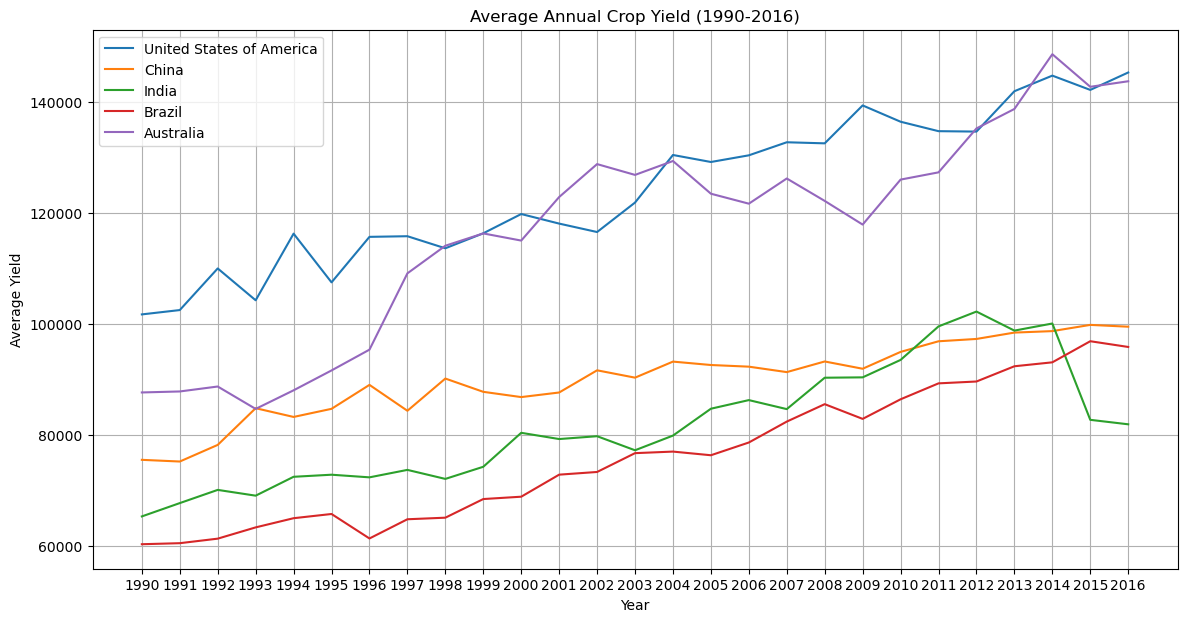

In [23]:
plt.figure(figsize=(14, 7))
for country in selected_countries:
    plt.plot(data_to_plot.index, data_to_plot[country], label=country)

plt.xlabel('Year')
plt.ylabel('Average Yield')
plt.title('Average Annual Crop Yield (1990-2016)')
plt.legend()
plt.grid(True)
plt.show()

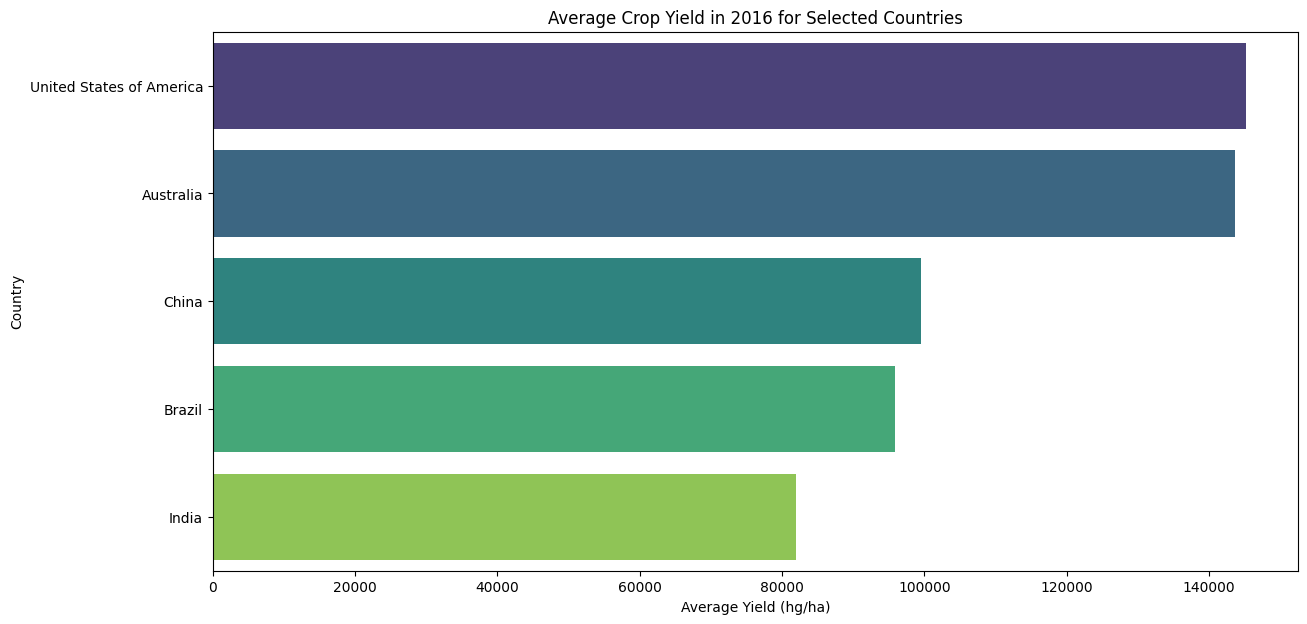

In [6]:
selected_country =['United States of America', 'China', 'India', 'Brazil', 'Australia'] #Could be changed to other countries by replacing the name of country
year = ('2016') #Could change to other years by replacing the year

if year:
    # Filter data for selected countries
    data_for_year = cleaned_data.loc[selected_country, year].dropna().sort_values(ascending=False).head(10)

    plt.figure(figsize=(14, 7))
    sns.barplot(x=data_for_year.values, y=data_for_year.index, palette='viridis')
    plt.xlabel('Average Yield (hg/ha)')
    plt.ylabel('Country')
    plt.title(f'Average Crop Yield in {year} for Selected Countries')
   

# Question 2: How do trends in temperature and precipitation vary among different countries from 1990 to 2016 and how do they affect the crop yield?

In [27]:
#Cleaned and filter data based on year 
pd.options.display.max_rows = None
crop_yield = pd.read_csv('yield.csv') #Path may differ
crop_yield.drop(columns=['Domain Code', 'Domain', 'Area Code', 'Element', 'Element Code','Item Code','Year Code'], inplace = True)

#remedy discrepancies in the naming of countries
crop_yield.columns = crop_yield.columns.str.replace('Area', 'Name')
crop_yield['Name'].replace({
    'China, Taiwan Province of':'Taiwan',
    'China, mainland': 'China',
    'China, Hong Kong SAR': 'Hong Kong, SAR',
    'Bahamas':'The Bahamas',
    'Bolivia (Plurinational State of)':'Bolivia',
    'Czechia':'Czech Republic',
    'Gambia':'The Gambia' ,
    'Micronesia (Federated States of)':'Federated States of Micronesia',
    'Iran (Islamic Republic of)':'Islamic Republic of Iran',
    'Réunion': 'Reunion',
    'Venezuela (Bolivarian Republic of)': 'Venezuela',
    'United Republic of Tanzania': 'Tanzania' 
}, inplace = True)

crop_yield.columns = crop_yield.columns.str.replace('Value', 'Crop Yield')
filtered_cy = crop_yield[(crop_yield.Year >= 1990) & (crop_yield.Year <= 2016)]

In [28]:
#save cleaned data into new csv
filtered_cy.to_csv('Q2filtered_cy.csv')

In [29]:
rf1 = pd.read_excel('Precipitation_1950-2014.xlsx')
rf2 = pd.read_excel('Precipitation_2015-2100.xlsx')

#merge two rf data together
merged_rf = rf1.merge(rf2, on = ['code','name'])

#remedy discrepancies in the naming of countries
merged_rf.loc[(merged_rf['code'] == 'REU') & (merged_rf['name'] == 'France'), 'name'] = 'Reunion'
merged_rf.loc[(merged_rf['code'] == 'GLP') & (merged_rf['name'] == 'France'), 'name'] = 'Guadeloupe'
merged_rf.loc[(merged_rf['code'] == 'GUF') & (merged_rf['name'] == 'France'), 'name'] = 'French Guiana'
merged_rf.loc[(merged_rf['code'] == 'MTQ') & (merged_rf['name'] == 'France'), 'name'] = 'Martinique'
merged_rf.loc[(merged_rf['code'] == 'MYT') & (merged_rf['name'] == 'France'), 'name'] = 'Mayotte'
merged_rf.loc[(merged_rf['code'] == 'TWN') & (merged_rf['name'] == 'China'), 'name'] = 'Taiwan'
merged_rf['name'].replace({
    'French Polynesia (Fr.)': 'French Polynesia',
    'American Samoa (U.S.)': 'American Samoa',
    'Bermuda (U.K.)' :'Bermuda',
    'Cayman Islands (U.K.)': 'Cayman Islands',
    'Cook Islands (N.Z.)': 'Cook Islands',
    'D. P. R. of Korea': "Democratic People's Republic of Korea",
    'Arab Republic of Egypt': 'Egypt',
    'Faroe Islands (Den.)': 'Faroe Islands',
    'Guam (U.S.)':'Guam', 
    'Montserrat (U.K.)' :'Montserrat',
    'Moldova': 'Republic of Moldova',
    'Niue (N.Z.)': 'Niue',
    'New Caledonia (Fr.)': 'New Caledonia',
    'Kyrgyz Republic': 'Kyrgyzstan',
    'Türkiye': 'Turkey',
    'Puerto Rico (U.S.)':'Puerto Rico',
    'Viet Nam': 'Vietnam',
    'Republic of Yemen': 'Yemen',
    'Slovak Republic': 'Slovakia' ,
    'Wallis and Futuna (Fr.)':'Wallis and Futuna Islands',
    'R. B. de Venezuela': 'Venezuela',
    'São Tomé and Príncipe': 'Sao Tome and Principe'
}, inplace = True)

#drop irrelevant columns and replace column names
merged_rf.drop('code', axis = 1, inplace=True)
merged_rf.columns = merged_rf.columns.str.replace('-07', '')
merged_rf.columns = merged_rf.columns.str.replace('name', 'Name')

country = ['Name']
year = merged_rf.columns.difference(country) #takes every column except for country(name and code)

#id_vars will remain the same while the value_vars now would become the value in the 'Year' column
rf = pd.melt(merged_rf, id_vars = country, value_vars = year, 
                  var_name = 'Year', value_name = 'Precipitation')

rf['Year'] = rf['Year'].astype(int)

filtered_rf = rf[(rf.Year >= 1990) & (rf.Year <= 2016)]

In [30]:
#save into new csv file
filtered_rf.to_csv('Q2filtered_rf.csv')

In [31]:
temp1 = pd.read_excel('Surface Air Temperature_1950-2014.xlsx')
temp2 = pd.read_excel('Surface Air Temp_2015-2100.xlsx')

merged_temp = temp1.merge(temp2, on = ['code','name'])

#remedy discrepancies in the naming of countries
merged_temp.loc[(merged_temp['code'] == 'REU') & (merged_temp['name'] == 'France'), 'name'] = 'Reunion'
merged_temp.loc[(merged_temp['code'] == 'GLP') & (merged_temp['name'] == 'France'), 'name'] = 'Guadeloupe'
merged_temp.loc[(merged_temp['code'] == 'GUF') & (merged_temp['name'] == 'France'), 'name'] = 'French Guiana'
merged_temp.loc[(merged_temp['code'] == 'MTQ') & (merged_temp['name'] == 'France'), 'name'] = 'Martinique'
merged_temp.loc[(merged_temp['code'] == 'MYT') & (merged_temp['name'] == 'France'), 'name'] = 'Mayotte'
merged_temp.loc[(merged_temp['code'] == 'TWN') & (merged_temp['name'] == 'China'), 'name'] = 'Taiwan'
merged_temp['name'].replace({
    'French Polynesia (Fr.)': 'French Polynesia',
    'American Samoa (U.S.)': 'American Samoa',
    'Bermuda (U.K.)' :'Bermuda',
    'Cayman Islands (U.K.)': 'Cayman Islands',
    'Cook Islands (N.Z.)': 'Cook Islands',
    'D. P. R. of Korea': "Democratic People's Republic of Korea",
    'Arab Republic of Egypt': 'Egypt',
    'Faroe Islands (Den.)': 'Faroe Islands',
    'Guam (U.S.)':'Guam', 
    'Montserrat (U.K.)' :'Montserrat',
    'Moldova': 'Republic of Moldova',
    'Niue (N.Z.)': 'Niue',
    'New Caledonia (Fr.)': 'New Caledonia',
    'Kyrgyz Republic': 'Kyrgyzstan',
    'Türkiye': 'Turkey',
    'Puerto Rico (U.S.)':'Puerto Rico',
    'Viet Nam': 'Vietnam',
    'Republic of Yemen': 'Yemen',
    'Slovak Republic': 'Slovakia' ,
    'Wallis and Futuna (Fr.)':'Wallis and Futuna Islands',
    'R. B. de Venezuela': 'Venezuela',
    'São Tomé and Príncipe': 'Sao Tome and Principe'
}, inplace = True)
#drop irrelevant columns and replace column names
merged_temp.drop('code', axis = 1, inplace=True)
merged_temp.columns = merged_temp.columns.str.replace('-07', '')
merged_temp.columns = merged_temp.columns.str.replace('name', 'Name')
year = merged_temp.columns.difference(country)


temp = pd.melt(merged_temp, id_vars = country, value_vars = year,
               var_name = 'Year', value_name = 'Temperature')

temp['Year'] = temp['Year'].astype(int)
filtered_temp = temp[(temp.Year >= 1990) & (temp.Year <= 2016)]

In [32]:
#save into new csv file
filtered_temp.to_csv('Q2filtered_temp.csv')

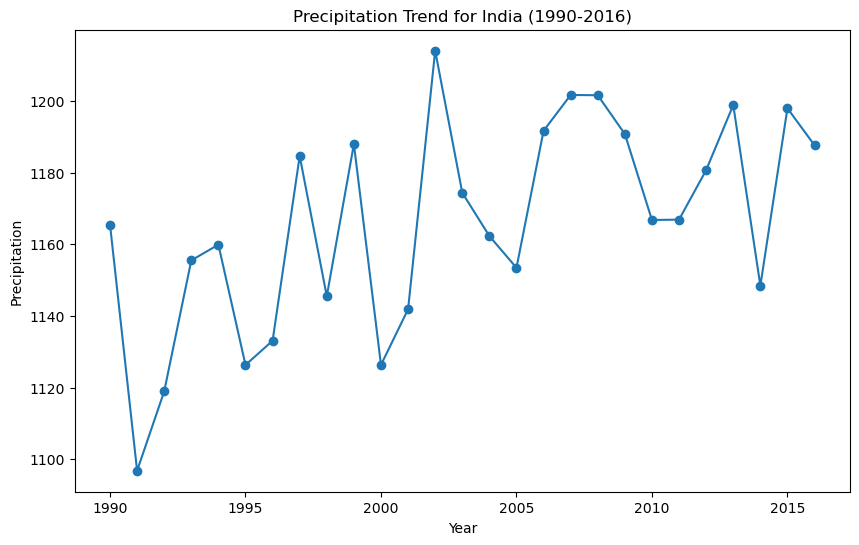

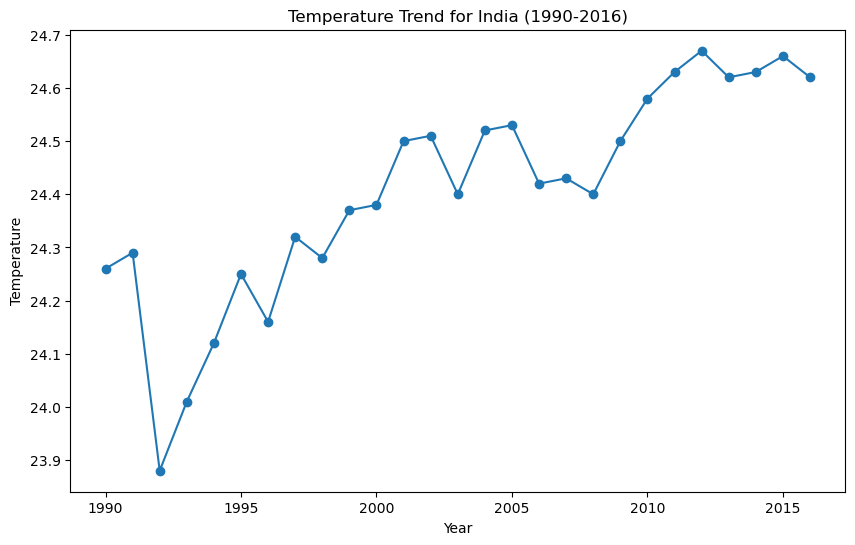

In [33]:
#visualise trend
cleaned_rf = pd.read_csv('Q2filtered_rf.csv')
cleaned_temp = pd.read_csv('Q2filtered_temp.csv')
def precipitation_trend(country_name):
    country_data = cleaned_rf[cleaned_rf['Name'] == country_name]

    plt.figure(figsize=(10, 6))
    plt.plot(country_data['Year'], country_data['Precipitation'], marker='o')
    plt.title(f'Precipitation Trend for {country_name} (1990-2016)')
    plt.xlabel('Year')
    plt.ylabel('Precipitation')
    plt.show()

def temp_trend(country_name):
    country_data = cleaned_temp[cleaned_temp['Name'] == country_name]

    plt.figure(figsize=(10, 6))
    plt.plot(country_data['Year'], country_data['Temperature'], marker='o')
    plt.title(f'Temperature Trend for {country_name} (1990-2016)')
    plt.xlabel('Year')
    plt.ylabel('Temperature')
    plt.show()


#plot trend based on country
precipitation_trend('India') 
temp_trend('India')

In [34]:
cleaned_cy = pd.read_csv('Q2filtered_cy.csv')
merged_data = cleaned_cy.merge(cleaned_rf, on = ['Name', 'Year'])
merged_data = merged_data.merge(filtered_temp, on = ['Name', 'Year'])

In [35]:
merged_data.to_csv('Q2merged_rf_temp_crop data.csv')

Available crop types in India:
1. Cassava
2. Maize
3. Potatoes
4. Rice, paddy
5. Sorghum
6. Soybeans
7. Sweet potatoes
8. Wheat


Enter number of choice to compare:  8


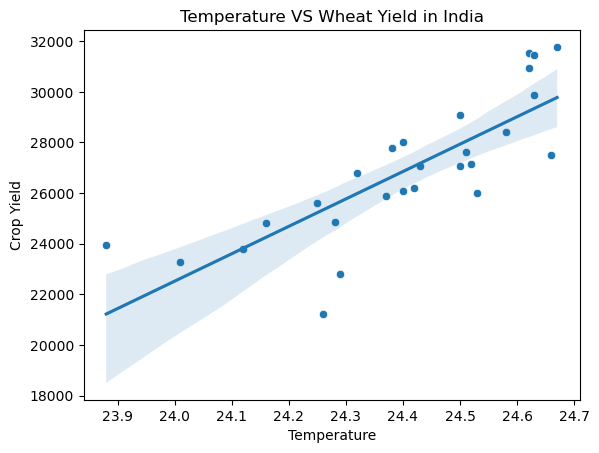

In [36]:
#crop_temp_scatter('India', 'Wheat')
cleaned_data = pd.read_csv('Q2merged_rf_temp_crop data.csv')
def crop_temp_scatter(country_name):
    country_data = cleaned_data[cleaned_data['Name'] == country_name]
    crop_available = country_data['Item'].unique()
    print(f"Available crop types in {country_name}:")
    for i, crop in enumerate(crop_available, 1):
        print(f"{i}. {crop}")
    choice = int(input("Enter number of choice to compare: ")) - 1
    selected_crop = crop_available[choice]
    crop_data = country_data[country_data['Item'] == selected_crop]
    ct_s = sns.scatterplot(x='Temperature', y='Crop Yield', data=crop_data)
    ct_s.set_title(f'Temperature VS {selected_crop} Yield in {country_name}')
    sns.regplot(x='Temperature', y='Crop Yield', data=crop_data, scatter=False, ax=ct_s)
    plt.show()
crop_temp_scatter('India')

Available crop types in India:
1. Cassava
2. Maize
3. Potatoes
4. Rice, paddy
5. Sorghum
6. Soybeans
7. Sweet potatoes
8. Wheat


Enter number of choice to compare:  3


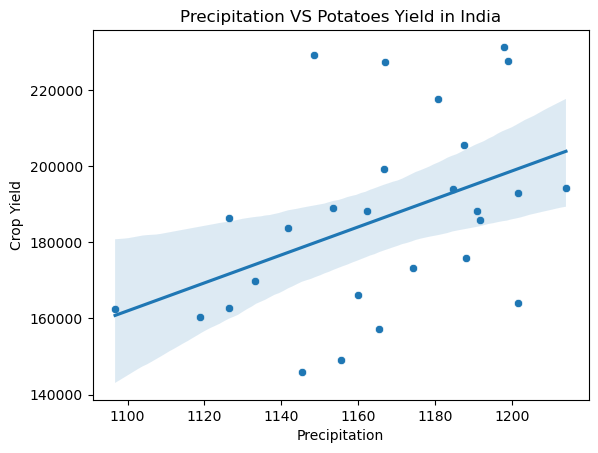

In [37]:
def crop_rf_scatter(country_name):
    country_data = cleaned_data[cleaned_data['Name'] == country_name]
    crop_available = country_data['Item'].unique()
    print(f"Available crop types in {country_name}:")
    for i, crop in enumerate(crop_available, 1):
        print(f"{i}. {crop}")
    choice = int(input("Enter number of choice to compare: ")) - 1
    selected_crop = crop_available[choice]
    crop_data = country_data[country_data['Item'] == selected_crop]
    crf_s = sns.scatterplot(x='Precipitation', y='Crop Yield', data=crop_data)
    crf_s.set_title(f'Precipitation VS {selected_crop} Yield in {country_name}')
    sns.regplot(x='Precipitation', y='Crop Yield', data=crop_data, scatter=False, ax=crf_s)
    plt.show()

crop_rf_scatter('India')

# Question 3: Does an increase in pesticide or fertiliser use cause an increase in crop yields, and does this causal relationship differ by country? 

### Clean And Merge Data Process

In [1]:
import pandas as pd

# Load the datasets
fertilizer_data = pd.read_csv('cereal-crop-yield-vs-fertilizer-application.csv')
pesticide_data = pd.read_csv('pesticides.csv')
yield_data = pd.read_csv('yield.csv')

# Cleaning Fertilizer Data
def clean_fertilizer_data(data):
    # Extract and rename relevant columns
    data_cleaned = data[['Entity', 'Year', 
                         'Cereals | 00001717 || Yield | 005419 || tonnes per hectare', 
                         'Nutrient nitrogen N (total) | 00003102 || Use per area of cropland | 005159 || Kilograms per hectare']].copy()
    data_cleaned.columns = ['Country', 'Year', 'Cereal Yield (tonnes/ha)', 'Nitrogen Fertilizer Use (kg/ha)']
    
    # Remove rows with missing values
    data_cleaned = data_cleaned.dropna()
    
    # Convert columns to numeric
    data_cleaned['Cereal Yield (tonnes/ha)'] = pd.to_numeric(data_cleaned['Cereal Yield (tonnes/ha)'])
    data_cleaned['Nitrogen Fertilizer Use (kg/ha)'] = pd.to_numeric(data_cleaned['Nitrogen Fertilizer Use (kg/ha)'])
    
    # Remove duplicates
    data_cleaned = data_cleaned.drop_duplicates()
    
    return data_cleaned

# Cleaning Pesticide Data
def clean_pesticide_data(yield_data, pesticide_data):
    # Ensure the necessary columns are present in the pesticide dataset
    pesticide_data = pesticide_data.rename(columns={'Value': 'Pesticide Use (tonnes)'})
    
    # Ensure the necessary columns are present in the yield dataset
    yield_data = yield_data.rename(columns={'Value': 'Crop Yield (hg/ha)'})
    
    # Merge datasets
    merged_data = pd.merge(yield_data, pesticide_data, left_on=['Area', 'Year'], right_on=['Area', 'Year'])
    
    # Remove rows with missing values
    merged_data = merged_data.dropna()
    
    # Convert columns to numeric
    merged_data['Crop Yield (hg/ha)'] = pd.to_numeric(merged_data['Crop Yield (hg/ha)'])
    merged_data['Pesticide Use (tonnes)'] = pd.to_numeric(merged_data['Pesticide Use (tonnes)'])
    
    # Remove duplicates
    merged_data = merged_data.drop_duplicates()
    
    return merged_data

# Cleaned datasets
cleaned_fertilizer_data = clean_fertilizer_data(fertilizer_data)
cleaned_pesticide_data = clean_pesticide_data(yield_data, pesticide_data)

# Save cleaned data (optional)
cleaned_fertilizer_data.to_csv('cleaned_fertilizer_data.csv', index=False)
cleaned_pesticide_data.to_csv('cleaned_pesticide_data.csv', index=False)

### Pesticide VS Crop Yield For A Specific Country
Note: Run and Enter a  country name (E.g. Malaysia) to see the graph 

Enter the name of the country to display the graph:  India


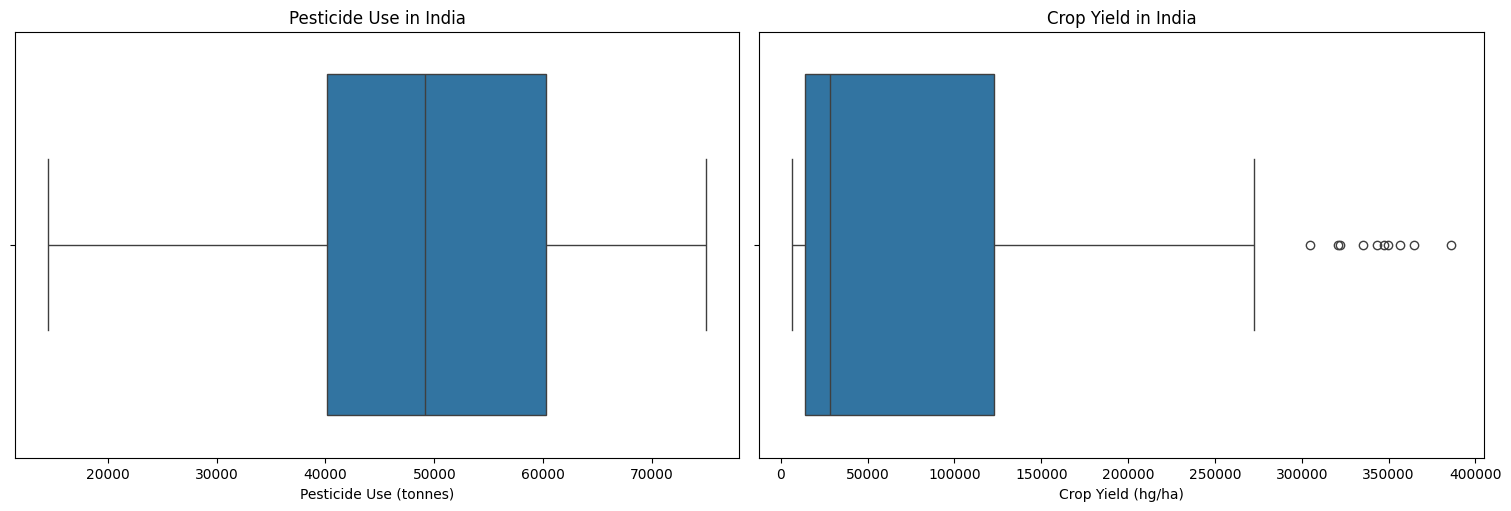

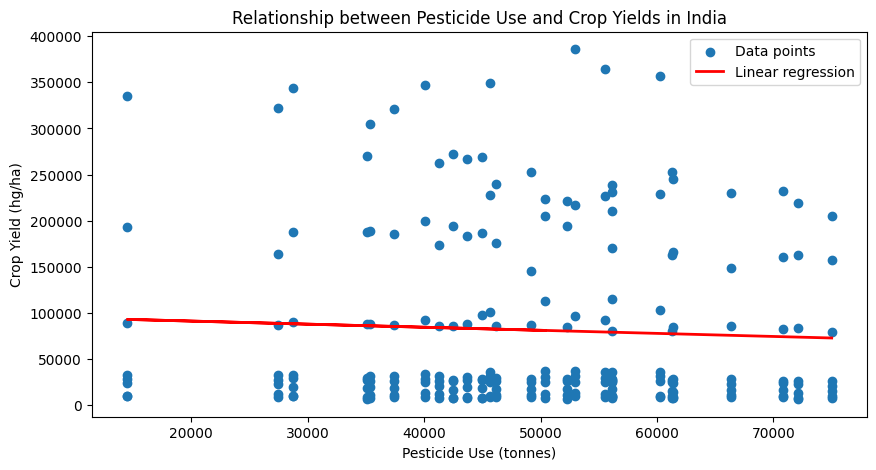

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

# Function to plot the graph for a specific area in pesticide dataset
def plot_pesticide_data(area_name, data):
    if area_name not in data['Area'].unique():
        print(f"Area '{area_name}' not found in the dataset.")
        return
    
    area_data = data[data['Area'] == area_name]
    
    # Create a figure with 2 subplots
    fig, axes = plt.subplots(1, 2, figsize=(15, 5), constrained_layout=True)
    
    # Boxplot for Pesticide Use
    sns.boxplot(ax=axes[0], x=area_data['Pesticide Use (tonnes)'])
    axes[0].set_title(f'Pesticide Use in {area_name}')
    axes[0].set_xlabel('Pesticide Use (tonnes)')
    
    # Boxplot for Crop Yield
    sns.boxplot(ax=axes[1], x=area_data['Crop Yield (hg/ha)'])
    axes[1].set_title(f'Crop Yield in {area_name}')
    axes[1].set_xlabel('Crop Yield (hg/ha)')
    
    # Scatter plot for the relationship between pesticide use and crop yields
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.scatter(area_data['Pesticide Use (tonnes)'], area_data['Crop Yield (hg/ha)'], label='Data points')
    ax.set_title(f'Relationship between Pesticide Use and Crop Yields in {area_name}')
    ax.set_xlabel('Pesticide Use (tonnes)')
    ax.set_ylabel('Crop Yield (hg/ha)')
    
    # Linear regression
    X = area_data['Pesticide Use (tonnes)'].values.reshape(-1, 1)
    Y = area_data['Crop Yield (hg/ha)'].values.reshape(-1, 1)
    reg = LinearRegression().fit(X, Y)
    Y_pred = reg.predict(X)
    
    ax.plot(X, Y_pred, color='red', linewidth=2, label='Linear regression')
    ax.legend()
    
    plt.show()

# Load the dataset
data = pd.read_csv('cleaned_pesticide_data.csv')

# Prompt the user to enter an area name
area_name = input("Enter the name of the country to display the graph: ")
plot_pesticide_data(area_name, data)


### Fertiliser VS Crop Yield For A Specific Country
Note: Run and Enter a  country name (E.g. Malaysia) to see the graph 

Enter the name of the country to display the graph:  India


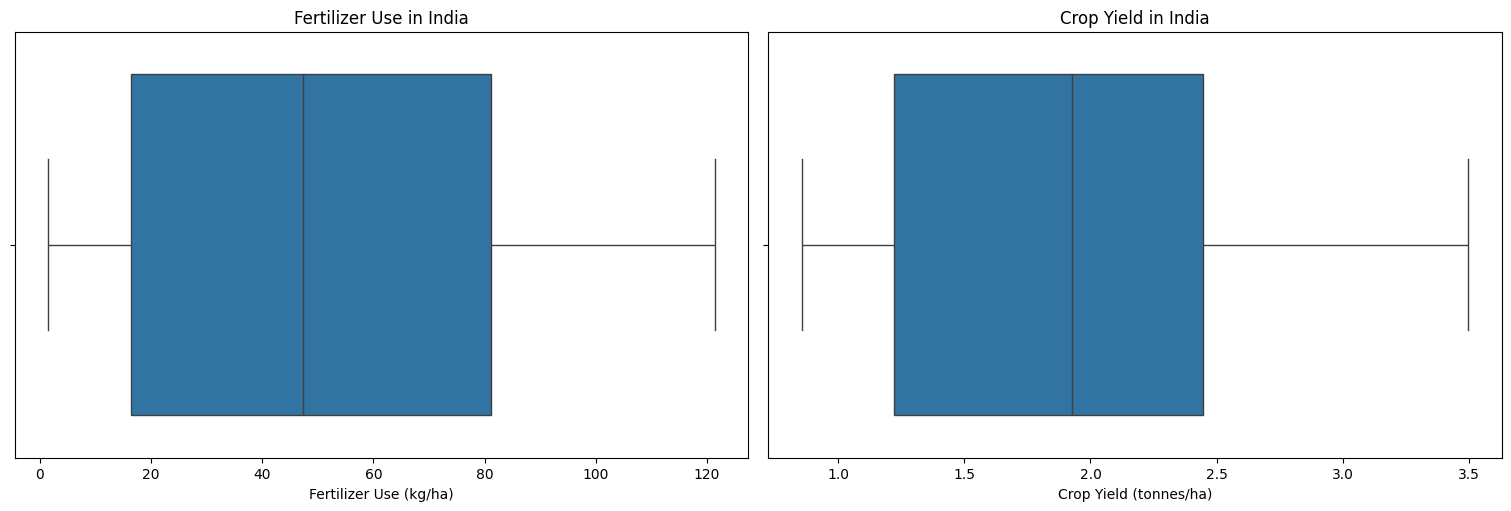

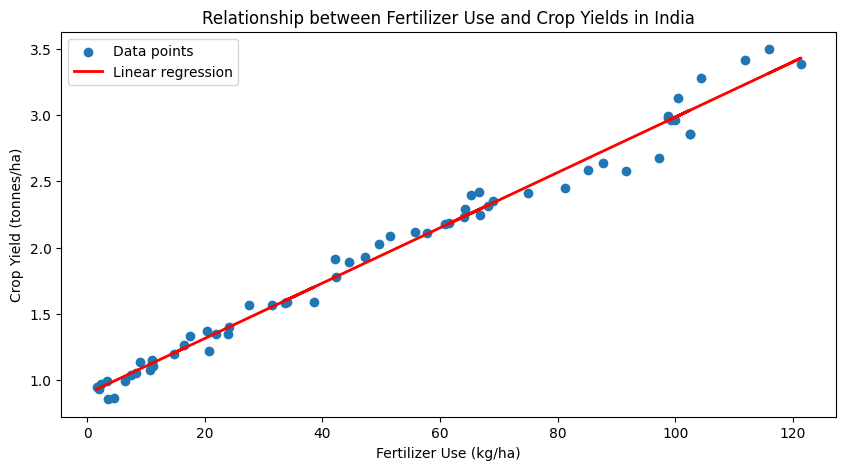

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

# Function to plot the graph for a specific country in fertilizer dataset
def plot_fertilizer_data(country_name, data):
    if country_name not in data['Country'].unique():
        print(f"Country '{country_name}' not found in the dataset.")
        return
    
    country_data = data[data['Country'] == country_name]
    
    # Create a figure with 2 subplots
    fig, axes = plt.subplots(1, 2, figsize=(15, 5), constrained_layout=True)
    
    # Boxplot for Fertilizer Use
    sns.boxplot(ax=axes[0], x=country_data['Nitrogen Fertilizer Use (kg/ha)'])
    axes[0].set_title(f'Fertilizer Use in {country_name}')
    axes[0].set_xlabel('Fertilizer Use (kg/ha)')
    
    # Boxplot for Crop Yield
    sns.boxplot(ax=axes[1], x=country_data['Cereal Yield (tonnes/ha)'])
    axes[1].set_title(f'Crop Yield in {country_name}')
    axes[1].set_xlabel('Crop Yield (tonnes/ha)')
    
    # Scatter plot for the relationship between fertilizer use and crop yields
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.scatter(country_data['Nitrogen Fertilizer Use (kg/ha)'], country_data['Cereal Yield (tonnes/ha)'], label='Data points')
    ax.set_title(f'Relationship between Fertilizer Use and Crop Yields in {country_name}')
    ax.set_xlabel('Fertilizer Use (kg/ha)')
    ax.set_ylabel('Crop Yield (tonnes/ha)')
    
    # Linear regression
    X = country_data['Nitrogen Fertilizer Use (kg/ha)'].values.reshape(-1, 1)
    Y = country_data['Cereal Yield (tonnes/ha)'].values.reshape(-1, 1)
    reg = LinearRegression().fit(X, Y)
    Y_pred = reg.predict(X)
    
    ax.plot(X, Y_pred, color='red', linewidth=2, label='Linear regression')
    ax.legend()
    
    plt.show()

# Load the dataset
data = pd.read_csv('cleaned_fertilizer_data.csv')

# Prompt the user to enter a country name
country_name = input("Enter the name of the country to display the graph: ")
plot_fertilizer_data(country_name, data)


### Relationship between Average Pesticide Use by Country and Mean Crop Yield ( with Outliers)

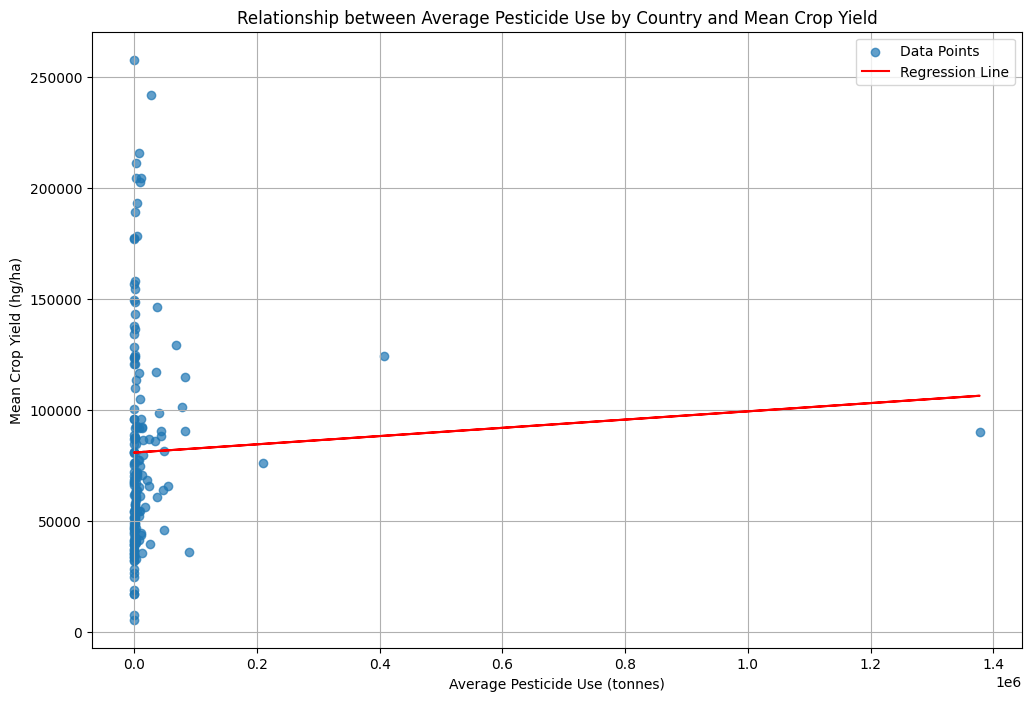

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

# Load the dataset
fertilizer_data = pd.read_csv('cleaned_pesticide_data.csv')

# Calculate mean values for each country
def calculate_mean_values(data):
    countries = data['Area'].unique()
    mean_values = []
    for country in countries:
        country_data = data[data['Area'] == country]
       
        mean_pesticide_use = country_data['Pesticide Use (tonnes)'].mean()
        mean_crop_yield = country_data['Crop Yield (hg/ha)'].mean()
        mean_values.append({
            'Country': country,
            'Mean Pesticide Use (tonnes)': mean_pesticide_use,
            'Mean Crop Yield (hg/ha)': mean_crop_yield
        })
    mean_data = pd.DataFrame(mean_values)
    return mean_data

mean_fertilizer_data = calculate_mean_values(fertilizer_data)

# Fit linear regression
X = mean_fertilizer_data[['Mean Pesticide Use (tonnes)']]
y = mean_fertilizer_data['Mean Crop Yield (hg/ha)']
model = LinearRegression()
model.fit(X, y)
regression_line = model.predict(X)

# Function to plot the graph with linear regression line
def plot_average(data, regression_line):
    plt.figure(figsize=(12, 8))
    
    # Scatter plot
    plt.scatter(data['Mean Pesticide Use (tonnes)'], data['Mean Crop Yield (hg/ha)'], alpha=0.7, label='Data Points')
    
    # Regression line
    plt.plot(data['Mean Pesticide Use (tonnes)'], regression_line, color='red', label='Regression Line')
    
    plt.title('Relationship between Average Pesticide Use by Country and Mean Crop Yield')
    plt.xlabel('Average Pesticide Use (tonnes)')
    plt.ylabel('Mean Crop Yield (hg/ha)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the graph 
plot_average(mean_fertilizer_data, regression_line)


### Relationship between Average Pesticide Use by Country and Mean Crop Yield (cleaned)

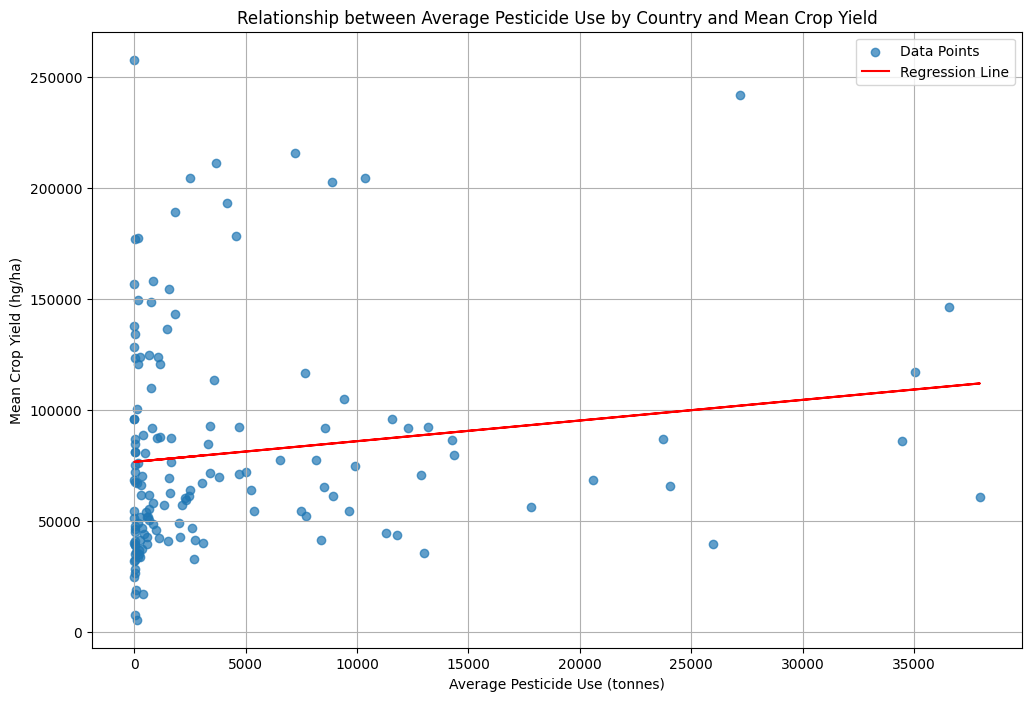

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the dataset
fertilizer_data = pd.read_csv('cleaned_pesticide_data.csv')

# Calculate mean values for each country
def calculate_mean_values(data):
    countries = data['Area'].unique()
    mean_values = []
    for country in countries:
        country_data = data[data['Area'] == country]
       
        mean_pesticide_use = country_data['Pesticide Use (tonnes)'].mean()
        mean_crop_yield = country_data['Crop Yield (hg/ha)'].mean()
        mean_values.append({
            'Country': country,
            'Mean Pesticide Use (tonnes)': mean_pesticide_use,
            'Mean Crop Yield (hg/ha)': mean_crop_yield
        })
    mean_data = pd.DataFrame(mean_values)
    return mean_data

mean_fertilizer_data = calculate_mean_values(fertilizer_data)

# Further filter out extreme outliers
mean_fertilizer_data = mean_fertilizer_data[mean_fertilizer_data['Mean Pesticide Use (tonnes)'] < 40000]

# Fit linear regression
X = mean_fertilizer_data[['Mean Pesticide Use (tonnes)']]
y = mean_fertilizer_data['Mean Crop Yield (hg/ha)']
model = LinearRegression()
model.fit(X, y)
regression_line = model.predict(X)

# Function to plot the graph with linear regression line
def plot_average(data, regression_line):
    plt.figure(figsize=(12, 8))
    
    # Scatter plot
    plt.scatter(data['Mean Pesticide Use (tonnes)'], data['Mean Crop Yield (hg/ha)'], alpha=0.7, label='Data Points')
    
    # Regression line
    plt.plot(data['Mean Pesticide Use (tonnes)'], regression_line, color='red', label='Regression Line')
    
    plt.title('Relationship between Average Pesticide Use by Country and Mean Crop Yield')
    plt.xlabel('Average Pesticide Use (tonnes)')
    plt.ylabel('Mean Crop Yield (hg/ha)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the graph 
plot_average(mean_fertilizer_data, regression_line)


### Relationship between Average Nitrogen Use by Country and Mean Crop Yields for All Countries

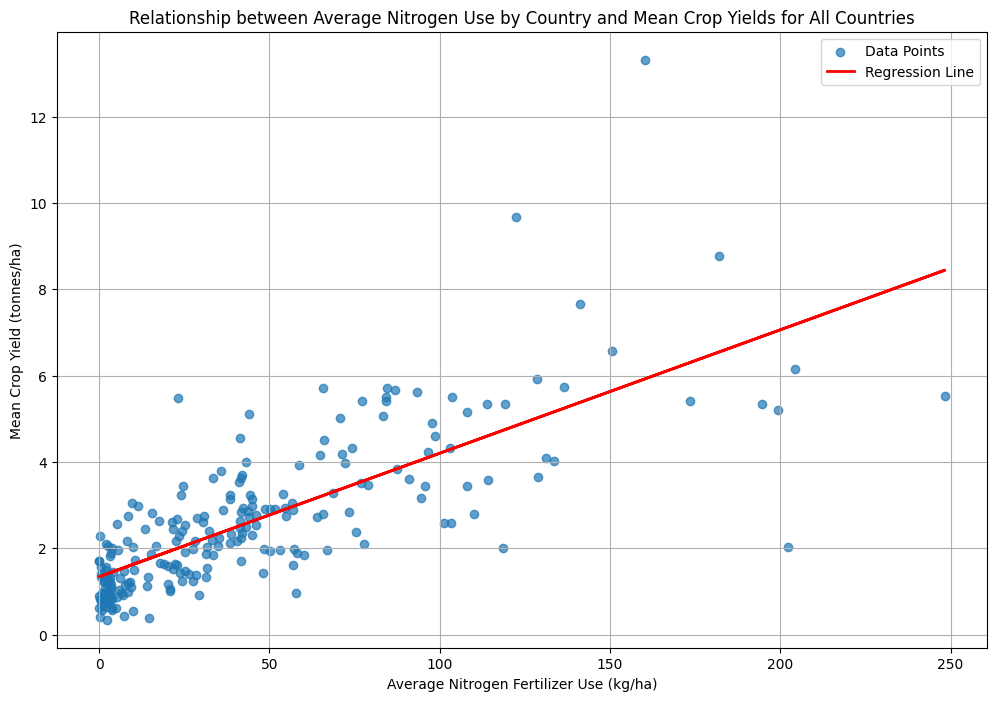

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

# Load the datasets
fertilizer_data = pd.read_csv('cleaned_fertilizer_data.csv')

# Calculate mean values for each country 
def calculate_mean_values(data):
    countries = data['Country'].unique()
    mean_values = []
    for country in countries:
        country_data = data[data['Country'] == country]
       
        mean_fertilizer_use = country_data['Nitrogen Fertilizer Use (kg/ha)'].mean()
        mean_crop_yield = country_data['Cereal Yield (tonnes/ha)'].mean()
        mean_values.append({
            'Country': country,
            'Mean Fertilizer Use (tonnes)': mean_fertilizer_use,
            'Mean Crop Yield (tonnes/ha)': mean_crop_yield
        })
    mean_data = pd.DataFrame(mean_values)
    return mean_data

mean_fertilizer_data = calculate_mean_values(fertilizer_data)

# Perform linear regression
X = mean_fertilizer_data[['Mean Fertilizer Use (tonnes)']]
y = mean_fertilizer_data['Mean Crop Yield (tonnes/ha)']

linear_regressor = LinearRegression()
linear_regressor.fit(X, y)

# Predictions for the regression line
y_pred = linear_regressor.predict(X)

# Function to plot the graph 
def plot_average(data, predictions):
    plt.figure(figsize=(12, 8))
    
    # Scatter plot 
    plt.scatter(data['Mean Fertilizer Use (tonnes)'], data['Mean Crop Yield (tonnes/ha)'], alpha=0.7, label='Data Points')
    
    # Regression line
    plt.plot(data['Mean Fertilizer Use (tonnes)'], predictions, color='red', linewidth=2, label='Regression Line')
    
    # Adding labels for each country
    #for i, row in data.iterrows():
        #plt.text(row['Mean Fertilizer Use (tonnes)'], row['Mean Crop Yield (tonnes/ha)'], row['Country'], fontsize=9)
    
    plt.title('Relationship between Average Nitrogen Use by Country and Mean Crop Yields for All Countries')
    plt.xlabel('Average Nitrogen Fertilizer Use (kg/ha)')
    plt.ylabel('Mean Crop Yield (tonnes/ha)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the graph
plot_average(mean_fertilizer_data, y_pred)


# Question 4: What is the future crop yields based on current and historical data on pesticide use, temperature, and precipitation? 

### Data Cleaning and Integration

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Surface Air Temperature Data
temp1 = pd.read_excel('Surface Air Temperature_1950-2014.xlsx')
temp2 = pd.read_excel('Surface Air Temp_2015-2100.xlsx')
# merge the two datasets of surface air temperature
temp = pd.merge(temp1, temp2, on=['code', 'name'], how = 'outer')

temperature = pd.melt(temp, id_vars=['code', 'name'], var_name='Year', value_name='Surface Air Temperature(\u00B0C)')

temperature['Year'] = temperature['Year'].str.split('-').str[0].astype(int)
temperature.rename(columns={'name': 'Country Name'}, inplace = True)
temperature

In [ ]:
# Identify country names of rows with duplicate country name and year but different values 
duplicate_rows = temperature[temperature.duplicated(['Year','Country Name'], keep=False)]
duplicate_rows
duplicate_rows.to_csv('duplicate_temperature_rows.csv', index=False)
print(duplicate_rows['Country Name'].unique())

In [ ]:
# Differentiate countries with the same name
temperature.loc[temperature['code'] == 'TWN', 'Country Name'] = 'Taiwan' #separate Taiwan and China
temperature = temperature[~((temperature['Country Name'] == 'France') & (temperature['code'] != 'FRA'))] #only take into account France homeland
temperature.drop('code', axis = 1, inplace = True)
temperature = temperature.groupby(['Country Name', 'Year']).agg({'Surface Air Temperature(\u00B0C)': 'mean'}).reset_index() #average of Finland 

In [ ]:
# check for duplicates after cleaning
duplicate_rows = temperature[temperature.duplicated(['Year','Country Name'], keep=False)]
duplicate_rows
print(duplicate_rows['Country Name'].unique())

In [ ]:
# show the temperature dataframe
temperature

In [ ]:
# Precipitation Data
precp1 = pd.read_excel('Precipitation_1950-2014.xlsx')
precp2 = pd.read_excel('Precipitation_2015-2100.xlsx')
# merge the two datasets of precipitation
precp = pd.merge(precp1, precp2, on=['code', 'name'])

precipitation = pd.melt(precp, id_vars=['code', 'name'], var_name='Year', value_name='Precipitation(mm)')

precipitation['Year'] = precipitation['Year'].str.split('-').str[0].astype(int)
precipitation.rename(columns={'name': 'Country Name'}, inplace = True)
precipitation

In [ ]:
# Identify country names of rows with duplicate country name and year but different values
duplicate_rows = precipitation[precipitation.duplicated(['Year','Country Name'], keep=False)]
duplicate_rows
duplicate_rows.to_csv('duplicate_precipitation_rows.csv', index=False)
print(duplicate_rows['Country Name'].unique())

In [ ]:
# Differentiate countries with the same name
precipitation.loc[precipitation['code'] == 'TWN', 'Country Name'] = 'Taiwan' #separate Taiwan and China
precipitation = precipitation[~((precipitation['Country Name'] == 'France') & (precipitation['code'] != 'FRA'))] #only take into account France homeland
precipitation.drop('code', axis = 1, inplace = True)
precipitation = precipitation.groupby(['Country Name', 'Year']).agg({'Precipitation(mm)': 'mean'}).reset_index() #average of Finland

In [ ]:
# check for duplicates after cleaning
duplicate_rows = precipitation[precipitation.duplicated(['Year','Country Name'], keep=False)]
duplicate_rows
print(duplicate_rows['Country Name'].unique())

In [ ]:
# show the precipitation dataframe
precipitation

In [ ]:
# Pesticides Data
pesticide = pd.read_csv('pesticides.csv')

# Remove unnecessary columns
pesticide.drop(['Domain', 'Element', 'Item', 'Unit'], axis=1, inplace=True)
# Rename columns
pesticide.rename(columns={'Area': 'Country Name', 'Value': 'Pesticide Used(tn)'}, inplace = True)
pesticide

In [ ]:
# Crop yield Data
crop_yield = pd.read_csv('All Types of Crop Yield.csv')

# Rearrange the columns of crop yield based on the number of missing values, from least to most
crop_abundance = crop_yield[[col for col in crop_yield.columns if col not in ['country', 'year']]].isnull().sum().sort_values().index.tolist()
print(crop_abundance)
# Select the crop yield columns based on least number of missing values AND economic importance
cleaned_crop_yield = crop_yield[['country','year', 'pulses_yield', 'maize_yield', 'sugar_crops_yield', 'tobacco_yield', 'rice_yield', 'wheat_yield']]
cleaned_crop_yield.rename(columns={'country': 'Country Name', 'year': 'Year'}, inplace = True)
cleaned_crop_yield.isnull().sum()/cleaned_crop_yield.shape[0]

In [ ]:
# show the cleaned crop yield dataframe
cleaned_crop_yield

In [ ]:
## Merge Datasets and Clean
# merge to pesticide first as it has the shortest time frame from 1990 to 2016
merged_data = pd.merge(pesticide, temperature, on=['Country Name', 'Year'], how='left') 
merged_data = pd.merge(merged_data, precipitation, on=['Country Name', 'Year'], how='left')
merged_data = pd.merge(merged_data, cleaned_crop_yield, on=['Country Name', 'Year'], how='left')

#show the ratio of NaN value in each columns/factors
merged_data.isnull().sum()/merged_data.shape[0]

In [ ]:
# display the merged data
merged_data

In [ ]:
# Look for country names in which it has missing values in precipitation column
# Upon some observation, some values are missing due to un-standardized country name across different dataset
merged_data[merged_data['Precipitation(mm)'].isna()]['Country Name'].unique()

In [ ]:
# Standardize country names across all datasets
country_mapping = {
    'The Bahamas': 'Bahamas',
    'Belgium-Luxembourg':'Luxembourg',
    'Bermuda (U.K.)':'Bermuda',
    'Bolivia (Plurinational State of)': 'Bolivia',
    'China, Hong Kong SAR':'Hong Kong, SAR',
    'China, Taiwan Province of': 'Taiwan',
    'Cook Islands (N.Z.)': 'Cook Islands',
    'Czechia':'Czech Republic',
    'Arab Republic of Egypt':'Egypt',
    'The Gambia':'Gambia',
    'Iran (Islamic Republic of)':'Islamic Republic of Iran',
    'Kyrgyz Republic':'Kyrgyzstan',
    'New Caledonia (Fr.)':'New Caledonia',
    'Republic of Moldova':'Moldova',
    'Serbia and Montenegro':'Serbia',
    'Slovak Republic':'Slovakia',
    'Sudan (former)':'Sudan',
    'The former Yugoslav Republic of Macedonia':'North Macedonia',
    'Türkiye':'Turkey',
    'United Republic of Tanzania':'Tanzania',
    'Venezuela (Bolivarian Republic of)':'Venezuela',
    'R. B. de Venezuela':'Venezuela',
    'Viet Nam':'Vietnam',
    'Republic of Yemen':'Yemen',
    'China, mainland':'China',
    'Brunei':'Brunei Darussalam',
    'Cape Verde':'Cabo Verde',
    'Hong Kong' : 'Hong Kong, SAR',
    "Cote d'Ivoire":"CÃ´te d'Ivoire",
    'Iran':'Islamic Republic of Iran',
    'Laos':"Lao People's Democratic Republic",
    'South Korea':'Republic of Korea',
    'Russia':'Russian Federation',
    'Syria':'Syrian Arab Republic',
    'East Timor':'Timor-Leste',
    'United States':'United States of America'
}

def standardize_country_names(df, country_col, mapping):
    df[country_col] = df[country_col].replace(mapping)
    return df

temperature = standardize_country_names(temperature, 'Country Name', country_mapping)
precipitation = standardize_country_names(precipitation, 'Country Name', country_mapping)
pesticide = standardize_country_names(pesticide, 'Country Name', country_mapping)
cleaned_crop_yield = standardize_country_names(cleaned_crop_yield, 'Country Name', country_mapping)

In [ ]:
# merge the data again 
# show the percentage of NaN values again, significant decrease of NaN ratio in all columns
merged_data = pd.merge(pesticide, temperature, on=['Country Name', 'Year'], how='left')
merged_data = pd.merge(merged_data, precipitation, on=['Country Name', 'Year'], how='left')
merged_data = pd.merge(merged_data, cleaned_crop_yield, on=['Country Name', 'Year'], how='left')

merged_data.isnull().sum()/merged_data.shape[0]

In [ ]:
# show the country name with NaN values in precipitation column for checking again 
# These countries are deemed insignificant or do not exist anymore
merged_data[merged_data['Precipitation(mm)'].isna()]['Country Name'].unique()

In [ ]:
# rows with these country names are removed
merged_cleaned_data = merged_data.dropna(subset=['Precipitation(mm)'])
merged_cleaned_data 

In [ ]:
# checking the ratio of NaN values in the merged and cleaned data
# No NaN values in the descriptor variables 
merged_cleaned_data.isnull().sum()/merged_data.shape[0]

In [ ]:
# export merged and clened data to a csv for more detailed inspection on the crop yield
merged_cleaned_data.to_csv('merged_cleaned_data.csv', index=False)

In [ ]:
# these countries do not have agriculutural activities on the prior selecetd crop types
# removed
merged_cleaned_data = merged_cleaned_data[~merged_cleaned_data['Country Name'].isin(['Bermuda', 'Cook Islands', "Côte d'Ivoire", 'Iceland', 'Seychelles', 'Tonga'])]
merged_cleaned_data

In [ ]:
# check the ratio of NaN values in the crop yield columns
# significant decrease in NaN values
merged_cleaned_data.isnull().sum()/merged_cleaned_data.shape[0]

In [ ]:
# save the final cleaned and merged data to a csv
merged_cleaned_data.to_csv('merged_cleaned_data.csv', index=False)

### Categorize countries based on their climate zone


In [ ]:
# Extract Country-Climate Zone table from the website
import requests
from bs4 import BeautifulSoup

# URL of the website
url = 'https://weatherandclimate.com/countries'

# Send a GET request to the website
response = requests.get(url)

# Parse the HTML content of the page
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table containing the country and climate zone data
table = soup.find('table')

# Extract the table headers
headers = []
for th in table.find_all('th'):
    headers.append(th.text.strip())

# Extract the table rows
rows = []
for tr in table.find_all('tr'):
    cells = tr.find_all('td')
    if len(cells) > 0:
        row = [cell.text.strip() for cell in cells]
        rows.append(row)

# Create a DataFrame from the extracted data
df = pd.DataFrame(rows, columns=headers)

# Save the DataFrame to a CSV file
df.to_csv('countries_climate_zones.csv', index=False)

In [ ]:
# Load the country-climate zone data
climate_zone = pd.read_csv('countries_climate_zones.csv')
climate_zone

In [ ]:
# rename the columns for consistency across datasets
climate_zone = climate_zone.rename(columns={'Country': 'Country Name'})

# standardize country names 
country_mapping['Democratic Republic of the Congo'] = 'Congo'
climate_zone = standardize_country_names(climate_zone, 'Country Name', country_mapping)

In [ ]:
# Merge climate zone data with the merged_cleaned_data
merged_cleaned_data = pd.merge(merged_cleaned_data, climate_zone[['Country Name', 'Climate zone']],  on='Country Name', how='left')

In [ ]:
# check for NaN values in the Climate zone column
merged_cleaned_data.loc[merged_cleaned_data['Climate zone'].isnull(), 'Country Name'].unique()

In [ ]:
# display the final merged and cleaned dataframe
merged_cleaned_data

In [ ]:
# move the Climate zone column to the second position
col = merged_cleaned_data.pop('Climate zone')
merged_cleaned_data.insert(1, col.name, col)

In [ ]:
# check the final order of columns
merged_cleaned_data

In [ ]:
# save the final cleaned and merged data to a csv
merged_cleaned_data.to_csv('merged_cleaned_data.csv', index=False)

### Data Mining
#### Analysis on the descriptor(feature) and response(label)
1. Identifying the most relevant features for predicting the target variable (crop yield).
2. Using correlation analysis and Kmeans clustering

In [ ]:
# Correlation Matrix
# Simplify the climate zone variable to the main climate zone
merged_cleaned_data['Main Climate Zone'] = merged_cleaned_data['Climate zone'].str[0]
col = merged_cleaned_data.pop('Main Climate Zone')
merged_cleaned_data.insert(1, col.name, col)
merged_cleaned_data

In [ ]:
# Save changes to the CSV file
merged_cleaned_data.to_csv('merged_cleaned_data.csv', index=False)

In [ ]:
# check the columns of the merged and cleaned data
merged_cleaned_data.columns

In [ ]:
# Select relevant columns 
corr_data = ['Main Climate Zone', 'Pesticide Used(tn)', 'Surface Air Temperature(°C)', 'Precipitation(mm)', 'pulses_yield', 'maize_yield', 
             'sugar_crops_yield', 'tobacco_yield', 'rice_yield', 'wheat_yield']

# One-hot encode the main climate zone for corr calculation
encoded_data = pd.get_dummies(merged_cleaned_data[corr_data], columns=['Main Climate Zone'])

# Calculate the correlation matrix
corr_matrix = encoded_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# experiment with generating a new feature by dividing the temperature by precipitation
merged_cleaned_data['temp_precip_ratio'] = merged_cleaned_data['Surface Air Temperature(°C)'] / merged_cleaned_data['Precipitation(mm)']

corr_data = ['Main Climate Zone', 'Pesticide Used(tn)', 'Surface Air Temperature(°C)', 'Precipitation(mm)','temp_precip_ratio', 'pulses_yield', 
             'maize_yield', 'sugar_crops_yield', 'tobacco_yield', 'rice_yield', 'wheat_yield']

# One-hot encode the main climate zone
encoded_data = pd.get_dummies(merged_cleaned_data[corr_data], columns=['Main Climate Zone'])

# Calculate the correlation matrix
corr_matrix = encoded_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# Drop the temp_precip_ratio column
merged_cleaned_data = merged_cleaned_data.drop(columns=['temp_precip_ratio'])
merged_cleaned_data

In [ ]:
# K-Means Clustering
from sklearn.preprocessing import LabelEncoder

# prep the data for clustering, encode the Main Climate Zone using LabelEncoder
encoder = LabelEncoder()

data_cat = merged_cleaned_data["Main Climate Zone"].values
data_cat_encoded = encoder.fit_transform(data_cat.astype('str'))   # this "fits" the labels to numerical classes
data_cat_encoded

In [ ]:
# show the classes of Climate Zone
encoder.classes_

In [ ]:
# add the encoded Climate Zone col to the dataframe
merged_cleaned_data['Main Climate Zone'] = encoder.fit_transform(merged_cleaned_data['Main Climate Zone'])
merged_cleaned_data

In [ ]:
# Select the relevant columns for clustering
data1 = merged_cleaned_data[['Main Climate Zone', 'Pesticide Used(tn)', 'Surface Air Temperature(°C)', 'Precipitation(mm)','maize_yield']]
                             #,'pulses_yield', 'sugar_crops_yield', 'tobacco_yield', 'rice_yield', 'wheat_yield']] 
#try using one type of crop only so there is less NaN values
data1.dropna(inplace=True)
data1.reset_index(drop=True)

In [ ]:
from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation 
ss = StandardScaler()
X = ss.fit_transform(data1) #calc z value of all elements (fit=subtract mean, transform=div by std)
print(data1)
print(X)     

In [ ]:
# Look for the optimal number of clusters using the Elbow Method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the inertia against the number of clusters
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
# The optimal k is likely 3 or 4
# Fit the KMeans model with the optimal number of clusters
model = KMeans(4, verbose=0, n_init='auto')
model.fit(X)

In [ ]:
# show the cluster centers and the number of data points in each cluster
print(model.cluster_centers_.shape)
model.cluster_centers_

In [ ]:
# show the labels of the data points
print(model.labels_.shape)
model.labels_

In [ ]:
# show the inertia, number of iterations, and the final locations of the centroids
print(model.inertia_)
print(model.n_iter_)

In [ ]:
# create a df to store the cluster centers
kmeans_labels = pd.DataFrame(model.labels_)   

In [ ]:
# show the cluster labels
model.labels_

In [ ]:
# add the cluster labels to the original dataframe
data1.insert((data1.shape[1]), 'kmeans', kmeans_labels)

In [ ]:
# show the data points with the cluster labels in a graph
def plot_kmeans_scatter(x, y):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    scatter = ax.scatter(x, y, c=kmeans_labels[0],s=50,cmap='jet',alpha=0.7)
    ax.set_title('K-Means Clustering')
    ax.set_xlabel(x.name)
    ax.set_ylabel(y.name)
    plt.colorbar(scatter)
    plt.show()


v1 = data1['Main Climate Zone']
v2 = data1['Pesticide Used(tn)']
v3 = data1['Surface Air Temperature(°C)']
v4 = data1['Precipitation(mm)']
v5 = data1['maize_yield']

plot_kmeans_scatter(v3, v5)

### Predictive Modelling and Analysis
#### Experimenring with different regression models
Using regression models as the response (crop yield) is a continuous variable.
1. Prepping copies of data for each crop type
2. Baseline model: simple models eg. Linear Regression model
3. Advanced Models: Experiment with more complex models eg. Polynomial Regression model, Random Forests, Decision Tree, Gradient Boosting
4. Cross validation to evaluate the generalisation ability of the models, or the performance of the model on unseen data
5. Model Evaluation: Compare model performance using Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R²)
6. Save the trained models as joblib files to be loaded during deployment.

In [ ]:
merged_cleaned_data = pd.read_csv('merged_cleaned_data.csv')

In [ ]:
# encode the Main Climate Zone using LabelEncoder
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data_cat = merged_cleaned_data["Main Climate Zone"].values
data_cat_encoded = encoder.fit_transform(data_cat.astype('str'))   
print(encoder.classes_)
merged_cleaned_data['Main Climate Zone'] = encoder.fit_transform(merged_cleaned_data['Main Climate Zone'])
merged_cleaned_data

In [ ]:
# check the columns of the merged and cleaned data
merged_cleaned_data.columns

In [ ]:
# check the data types of the columns
merged_cleaned_data.dtypes

In [ ]:
import copy
from sklearn.model_selection import train_test_split

In [ ]:
# Create a subset of the merged and cleaned data for the model based on the crop type
# check and drop NaN values in the selected crop yield column
# split the data into training and testing sets
## Pulses
pulses_model_df = copy.deepcopy(merged_cleaned_data[['Main Climate Zone','Pesticide Used(tn)', 
                                                     'Surface Air Temperature(°C)', 'Precipitation(mm)', 
                                                     'pulses_yield']].dropna(subset=['pulses_yield']))
print(pulses_model_df.isna().sum())
pulses_model_df.reset_index(drop=True, inplace=True)
print(pulses_model_df)
X_pulses = pulses_model_df.drop("pulses_yield", axis=1)  
y_pulses = pulses_model_df["pulses_yield"].copy()        
print(X_pulses.shape)
print(y_pulses.shape)

X_pulses_train, X_pulses_test, y_pulses_train, y_pulses_test = train_test_split(X_pulses, y_pulses, random_state=1)
print(X_pulses_train.shape)
print(y_pulses_train.shape)
print(X_pulses_test.shape)
print(y_pulses_test.shape)

In [ ]:
## Maize
maize_model_df = copy.deepcopy(merged_cleaned_data[['Main Climate Zone','Pesticide Used(tn)', 'Surface Air Temperature(°C)', 'Precipitation(mm)', 
                                     'maize_yield']].dropna(subset=['maize_yield']))
print(maize_model_df.isna().sum())
maize_model_df.reset_index(drop=True, inplace=True)
maize_model_df
X_maize = maize_model_df.drop("maize_yield", axis=1)     # drop labels from original data
y_maize = maize_model_df["maize_yield"].copy()    # copy the labels to another dataframe/series
print(X_maize.shape)
print(y_maize.shape)

X_maize_train, X_maize_test, y_maize_train, y_maize_test = train_test_split(X_maize, y_maize, random_state=1)
print(X_maize_train.shape)
print(y_maize_train.shape)
print(X_maize_test.shape)
print(y_maize_test.shape)

In [ ]:
## Sugar Crops
sugar_crops_model_df = copy.deepcopy(merged_cleaned_data[['Main Climate Zone','Pesticide Used(tn)', 
                                                          'Surface Air Temperature(°C)', 'Precipitation(mm)', 
                                                          'sugar_crops_yield']].dropna(subset=['sugar_crops_yield']))
print(sugar_crops_model_df.isna().sum())
sugar_crops_model_df.reset_index(drop=True, inplace=True)
print(sugar_crops_model_df)
X_sugar_crops = sugar_crops_model_df.drop("sugar_crops_yield", axis=1)  
y_sugar_crops = sugar_crops_model_df["sugar_crops_yield"].copy()        
print(X_sugar_crops.shape)
print(y_sugar_crops.shape)

X_sugar_crops_train, X_sugar_crops_test, y_sugar_crops_train, y_sugar_crops_test = train_test_split(X_sugar_crops, y_sugar_crops, random_state=1)
print(X_sugar_crops_train.shape)
print(y_sugar_crops_train.shape)
print(X_sugar_crops_test.shape)
print(y_sugar_crops_test.shape)

In [ ]:
## Tobacco
tobacco_model_df = copy.deepcopy(merged_cleaned_data[['Main Climate Zone','Pesticide Used(tn)', 
                                                      'Surface Air Temperature(°C)', 'Precipitation(mm)', 
                                                      'tobacco_yield']].dropna(subset=['tobacco_yield']))
print(tobacco_model_df.isna().sum())
tobacco_model_df.reset_index(drop=True, inplace=True)
print(tobacco_model_df)
X_tobacco = tobacco_model_df.drop("tobacco_yield", axis=1)  
y_tobacco = tobacco_model_df["tobacco_yield"].copy()        
print(X_tobacco.shape)
print(y_tobacco.shape)

X_tobacco_train, X_tobacco_test, y_tobacco_train, y_tobacco_test = train_test_split(X_tobacco, y_tobacco, random_state=1)
print(X_tobacco_train.shape)
print(y_tobacco_train.shape)
print(X_tobacco_test.shape)
print(y_tobacco_test.shape)

In [ ]:
## Rice
rice_model_df = copy.deepcopy(merged_cleaned_data[['Main Climate Zone','Pesticide Used(tn)', 
                                                   'Surface Air Temperature(°C)', 'Precipitation(mm)', 
                                                   'rice_yield']].dropna(subset=['rice_yield']))
print(rice_model_df.isna().sum())
rice_model_df.reset_index(drop=True, inplace=True)
print(rice_model_df)
X_rice = rice_model_df.drop("rice_yield", axis=1)  
y_rice = rice_model_df["rice_yield"].copy()        
print(X_rice.shape)
print(y_rice.shape)

X_rice_train, X_rice_test, y_rice_train, y_rice_test = train_test_split(X_rice, y_rice, random_state=1)
print(X_rice_train.shape)
print(y_rice_train.shape)
print(X_rice_test.shape)
print(y_rice_test.shape)

In [ ]:
## Wheat
wheat_model_df = copy.deepcopy(merged_cleaned_data[['Main Climate Zone','Pesticide Used(tn)', 
                                                    'Surface Air Temperature(°C)', 'Precipitation(mm)', 
                                                    'wheat_yield']].dropna(subset=['wheat_yield']))
print(wheat_model_df.isna().sum())
wheat_model_df.reset_index(drop=True, inplace=True)
print(wheat_model_df)
X_wheat = wheat_model_df.drop("wheat_yield", axis=1)  
y_wheat = wheat_model_df["wheat_yield"].copy()        
print(X_wheat.shape)
print(y_wheat.shape)

X_wheat_train, X_wheat_test, y_wheat_train, y_wheat_test = train_test_split(X_wheat, y_wheat, random_state=1)
print(X_wheat_train.shape)
print(y_wheat_train.shape)
print(X_wheat_test.shape)
print(y_wheat_test.shape)

In [ ]:
# def function to train linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

def train_linear_regression(X_train, y_train, X_test, y_test, df, crop_name, crop_yield):
    # Initialize Linear Regression model
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)

    # Print Linear Regression Equation
    coef_lr = lr_model.coef_
    intercept_lr = lr_model.intercept_
    equation = f'{crop_name}_yield = {intercept_lr:.2f}'
    feature_names = X_train.columns
    for coef, feature in zip(coef_lr, feature_names):
        equation += f' + ({coef:.2f} * {feature})'
    print(f'Linear Regression Equation for {crop_name}: {equation}')

    # Evaluate Linear Regression Model
    y_pred_lr = lr_model.predict(X_test)
    mse_lr = mean_squared_error(y_test, y_pred_lr)
    mae_lr = mean_absolute_error(y_test, y_pred_lr)
    r2_lr = r2_score(y_test, y_pred_lr)
    print(f'Linear Regression - MSE: {mse_lr}, MAE: {mae_lr}, R²: {r2_lr}')

    # Visualize the regression line
    features = ['Surface Air Temperature(°C)', 'Precipitation(mm)', 'Main Climate Zone', 'Pesticide Used(tn)']
    fig, axes = plt.subplots(nrows=len(features), ncols=1, figsize=(6, len(feature)))
    for i, feature in enumerate(features):
        sns.regplot(x=feature, y=crop_yield, data = df,
                    scatter_kws={"color": "blue"}, line_kws={"color": "red"}, ax=axes[i])
        axes[i].set_title(f'{crop_name.capitalize()} Yield vs {feature}')
    
    plt.tight_layout()
    plt.show()

    # Return model and predictions
    return lr_model, mse_lr, mae_lr, r2_lr

In [ ]:
# def function to train random forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def train_random_forest(X_train, y_train, X_test, y_test):
    # Initialize Random Forest Regressor model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Evaluate the Random Forest Regressor model
    y_pred_rf = rf_model.predict(X_test)
    mse_rf = mean_squared_error(y_test, y_pred_rf)
    mae_rf = mean_absolute_error(y_test, y_pred_rf)
    r2_rf = r2_score(y_test, y_pred_rf)
    print(f'Random Forest - MSE: {mse_rf}, MAE: {mae_rf}, R²: {r2_rf}')

    # Return model and evaluation metrics
    return rf_model, mse_rf, mae_rf, r2_rf

In [ ]:
# def function to train polynomial regression model
from sklearn.preprocessing import PolynomialFeatures

def train_polynomial_regression(X_train, y_train, X_test, y_test, X, crop_name):
    mae_scores = []
    for deg in range(2,10):
        poly_deg = PolynomialFeatures(degree = deg)
        X_train_poly = poly_deg.fit_transform(X_train)
        X_test_poly = poly_deg.transform(X_test)
        poly_model = LinearRegression()
        poly_model.fit(X_train_poly, y_train)
        y_pred_poly = poly_model.predict(X_test_poly)
        poly_mae = mean_absolute_error(y_test, y_pred_poly)
        mae_scores.append(poly_mae)

    poly_deg = np.arange(2, 10)
    plt.figure(figsize=(10, 6))
    plt.plot(poly_deg, mae_scores, marker='o', linestyle='-', color='b')
    plt.xlabel('poly_deg')
    plt.ylabel('Mean Absolute Error (MAE)')
    plt.title('poly_deg vs. MAE')
    plt.grid(True)
    plt.show()

    optimal_poly_deg = poly_deg[np.argmin(mae_scores)]
    optimal_poly_deg
    print('Optimal degree of polynomial of the polynomial regression is %d' % optimal_poly_deg)

    poly_deg = PolynomialFeatures(degree = optimal_poly_deg)
    X_train_poly = poly_deg.fit_transform(X_train)
    X_test_poly = poly_deg.transform(X_test)
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)

    coef_poly = poly_model.coef_
    intercept_poly = poly_model.intercept_
    feature_names = X.columns
    equation = f'{crop_name}_yield = {intercept_poly:.2f}'
    for coef, feature in zip(coef_poly, feature_names):
        equation += f' + ({coef:.2f} * {feature})'
    print(f'Polynomial Regression Equation for {crop_name}: {equation}')


    y_pred_poly = poly_model.predict(X_test_poly)

    mse_poly = mean_squared_error(y_test, y_pred_poly)
    mae_poly = mean_absolute_error(y_test, y_pred_poly)
    r2_poly = r2_score(y_test, y_pred_poly)
    print(f'Polynomial Regression - MSE: {mse_poly}, MAE: {mae_poly}, R²: {r2_poly}')

    return poly_model, mse_poly, mae_poly, r2_poly

In [ ]:
# def function to train gradient boosting model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

def train_gradient_boosting(X_train, y_train, X_test, y_test):
    # Initialize Gradient Boosting model
    gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
    gb_model.fit(X_train, y_train)

    # Evaluate Gradient Boosting Model
    y_pred_gb = gb_model.predict(X_test)
    mse_gb = mean_squared_error(y_test, y_pred_gb)
    mae_gb = mean_absolute_error(y_test, y_pred_gb)
    r2_gb = r2_score(y_test, y_pred_gb)
    print(f'Gradient Boosting - MSE: {mse_gb}, MAE: {mae_gb}, R²: {r2_gb}')

    # Return model and predictions
    return gb_model, mse_gb, mae_gb, r2_gb

In [ ]:
# def function to train decision tree model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def train_decision_tree(X_train, y_train, X_test, y_test, crop_name):
    # Find optimal max depth
    mae_scores = []
    for md in range(1, 21):
        dtr = DecisionTreeRegressor(max_depth=md)
        dtr.fit(X_train, y_train)
        y_pred_dtr = dtr.predict(X_test)
        dtr_mae = mean_absolute_error(y_test, y_pred_dtr)
        mae_scores.append(dtr_mae)

    max_depths = np.arange(1, 21)
    plt.figure(figsize=(8, 5))
    plt.plot(max_depths, mae_scores, marker='o', linestyle='-', color='b')
    plt.xlabel('max_depth')
    plt.ylabel('Mean Absolute Error (MAE)')
    plt.title(f'{crop_name.capitalize()} Decision Tree max_depth vs. MAE')
    plt.grid(True)
    plt.show()

    optimal_max_depth = max_depths[np.argmin(mae_scores)]
    print(f'Optimal max depth of the decision tree for {crop_name} is {optimal_max_depth}')

    # Initialize and train the Decision Tree model with optimal max depth
    dtr_model = DecisionTreeRegressor(max_depth=optimal_max_depth)
    dtr_model.fit(X_train, y_train)

    # Evaluate the Decision Tree model
    y_pred_dtr = dtr_model.predict(X_test)
    mse_dtr = mean_squared_error(y_test, y_pred_dtr)
    mae_dtr = mean_absolute_error(y_test, y_pred_dtr)
    r2_dtr = r2_score(y_test, y_pred_dtr)
    print(f'Decision Tree - MSE: {mse_dtr}, MAE: {mae_dtr}, R²: {r2_dtr}')

    # Return model and predictions
    return dtr_model, mse_dtr, mae_dtr, r2_dtr

In [ ]:
# Fit in models for each crop type
# Show the regression equation of linear and polynomial regression model
# show the R2, MSE and MAE of each model
# show the linear regression graph of each crop yield to the descriptor varibles respectively
# show the graphs of polynomial degree vs MAE, max depth of decision tree vs MAE. 
# The above graphs are used to determine the optimal polynomial degree and max depth for
# polynomial regression and decision tree model respectively using the elbow method. 
# Pulses
lr_pulses, mse_lr_pulses, mae_lr_pulses, r2_lr_pulses = train_linear_regression(X_pulses_train, y_pulses_train, X_pulses_test, y_pulses_test, pulses_model_df, 'pulses', 'pulses_yield')
rf_pulses, mse_rf_pulses, mae_rf_pulses, r2_rf_pulses = train_random_forest(X_pulses_train, y_pulses_train, X_pulses_test, y_pulses_test)
poly_pulses, mse_poly_pulses, mae_poly_pulses, r2_poly_pulses = train_polynomial_regression(X_pulses_train, y_pulses_train, X_pulses_test, y_pulses_test, pulses_model_df, 'pulses')
gb_pulses, mse_gb_pulses, mae_gb_pulses, r2_gb_pulses = train_gradient_boosting(X_pulses_train, y_pulses_train, X_pulses_test, y_pulses_test)
dtr_pulses, mse_dtr_pulses, mae_dtr_pulses, r2_dtr_pulses = train_decision_tree(X_pulses_train, y_pulses_train, X_pulses_test, y_pulses_test, 'pulses')

In [ ]:
# Maize
lr_maize, mse_lr_maize, mae_lr_maize, r2_lr_maize = train_linear_regression(X_maize_train, y_maize_train, X_maize_test, y_maize_test, maize_model_df, 'maize', 'maize_yield')
rf_maize, mse_rf_maize, mae_rf_maize, r2_rf_maize = train_random_forest(X_maize_train, y_maize_train, X_maize_test, y_maize_test)
poly_maize, mse_poly_maize, mae_poly_maize, r2_poly_maize = train_polynomial_regression(X_maize_train, y_maize_train, X_maize_test, y_maize_test, maize_model_df, 'maize')
gb_maize, mse_gb_maize, mae_gb_maize, r2_gb_maize = train_gradient_boosting(X_maize_train, y_maize_train, X_maize_test, y_maize_test)
dtr_maize, mse_dtr_maize, mae_dtr_maize, r2_dtr_maize = train_decision_tree(X_maize_train, y_maize_train, X_maize_test, y_maize_test, 'maize')

In [ ]:
# Sugar Crops
lr_sugar_crops, mse_lr_sugar_crops, mae_lr_sugar_crops, r2_lr_sugar_crops = train_linear_regression(X_sugar_crops_train, y_sugar_crops_train, X_sugar_crops_test, y_sugar_crops_test, sugar_crops_model_df, 'sugar_crops', 'sugar_crops_yield')
rf_sugar_crops, mse_rf_sugar_crops, mae_rf_sugar_crops, r2_rf_sugar_crops = train_random_forest(X_sugar_crops_train, y_sugar_crops_train, X_sugar_crops_test, y_sugar_crops_test)
poly_sugar_crops, mse_poly_sugar_crops, mae_poly_sugar_crops, r2_poly_sugar_crops = train_polynomial_regression(X_sugar_crops_train, y_sugar_crops_train, X_sugar_crops_test, y_sugar_crops_test, sugar_crops_model_df, 'sugar_crops')
gb_sugar_crops, mse_gb_sugar_crops, mae_gb_sugar_crops, r2_gb_sugar_crops = train_gradient_boosting(X_sugar_crops_train, y_sugar_crops_train, X_sugar_crops_test, y_sugar_crops_test)
dtr_sugar_crops, mse_dtr_sugar_crops, mae_dtr_sugar_crops, r2_dtr_sugar_crops = train_decision_tree(X_sugar_crops_train, y_sugar_crops_train, X_sugar_crops_test, y_sugar_crops_test, 'sugar_crops')

In [ ]:
# Tobacco
lr_tobacco, mse_lr_tobacco, mae_lr_tobacco, r2_lr_tobacco = train_linear_regression(X_tobacco_train, y_tobacco_train, X_tobacco_test, y_tobacco_test, tobacco_model_df, 'tobacco', 'tobacco_yield')
rf_tobacco, mse_rf_tobacco, mae_rf_tobacco, r2_rf_tobacco = train_random_forest(X_tobacco_train, y_tobacco_train, X_tobacco_test, y_tobacco_test)
poly_tobacco, mse_poly_tobacco, mae_poly_tobacco, r2_poly_tobacco = train_polynomial_regression(X_tobacco_train, y_tobacco_train, X_tobacco_test, y_tobacco_test, tobacco_model_df, 'tobacco')
gb_tobacco, mse_gb_tobacco, mae_gb_tobacco, r2_gb_tobacco = train_gradient_boosting(X_tobacco_train, y_tobacco_train, X_tobacco_test, y_tobacco_test)
dtr_tobacco, mse_dtr_tobacco, mae_dtr_tobacco, r2_dtr_tobacco = train_decision_tree(X_tobacco_train, y_tobacco_train, X_tobacco_test, y_tobacco_test, 'tobacco')

In [ ]:
# Rice
lr_rice, mse_lr_rice, mae_lr_rice, r2_lr_rice = train_linear_regression(X_rice_train, y_rice_train, X_rice_test, y_rice_test, rice_model_df, 'rice', 'rice_yield')
rf_rice, mse_rf_rice, mae_rf_rice, r2_rf_rice = train_random_forest(X_rice_train, y_rice_train, X_rice_test, y_rice_test)
poly_rice, mse_poly_rice, mae_poly_rice, r2_poly_rice = train_polynomial_regression(X_rice_train, y_rice_train, X_rice_test, y_rice_test, rice_model_df, 'rice')
gb_rice, mse_gb_rice, mae_gb_rice, r2_gb_rice = train_gradient_boosting(X_rice_train, y_rice_train, X_rice_test, y_rice_test)
dtr_rice, mse_dtr_rice, mae_dtr_rice, r2_dtr_rice = train_decision_tree(X_rice_train, y_rice_train, X_rice_test, y_rice_test, 'rice')

In [ ]:
# Wheat
lr_wheat, mse_lr_wheat, mae_lr_wheat, r2_lr_wheat = train_linear_regression(X_wheat_train, y_wheat_train, X_wheat_test, y_wheat_test, wheat_model_df, 'wheat', 'wheat_yield')
rf_wheat, mse_rf_wheat, mae_rf_wheat, r2_rf_wheat = train_random_forest(X_wheat_train, y_wheat_train, X_wheat_test, y_wheat_test)
poly_wheat, mse_poly_wheat, mae_poly_wheat, r2_poly_wheat = train_polynomial_regression(X_wheat_train, y_wheat_train, X_wheat_test, y_wheat_test, wheat_model_df, 'wheat')
gb_wheat, mse_gb_wheat, mae_gb_wheat, r2_gb_wheat = train_gradient_boosting(X_wheat_train, y_wheat_train, X_wheat_test, y_wheat_test)
dtr_wheat, mse_dtr_wheat, mae_dtr_wheat, r2_dtr_wheat = train_decision_tree(X_wheat_train, y_wheat_train, X_wheat_test, y_wheat_test, 'wheat')

### Cross Validation and Evaluation

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate

scoring = {
    'MSE': make_scorer(mean_squared_error),
    'MAE': make_scorer(mean_absolute_error),
    'R2': make_scorer(r2_score)
}

In [ ]:
# Cross-validate all the models for each crop type
# Compare the models based on the evaluation metrics (MSE, MAE, R²) and cross-validation scores for each crop type
# Pulses
cv_results_lr_pulses = cross_validate(lr_pulses, X_pulses_train, y_pulses_train, cv=5, scoring=scoring, return_train_score=False)
cv_results_rf_pulses = cross_validate(rf_pulses, X_pulses_train, y_pulses_train, cv=5, scoring=scoring, return_train_score=False)
cv_results_poly_pulses = cross_validate(poly_pulses, X_pulses_train, y_pulses_train, cv=5, scoring=scoring, return_train_score=False)
cv_results_gb_pulses = cross_validate(gb_pulses, X_pulses_train, y_pulses_train, cv=5, scoring=scoring, return_train_score=False)
cv_results_dtr_pulses = cross_validate(dtr_pulses, X_pulses_train, y_pulses_train, cv=5, scoring=scoring, return_train_score=False)

print('Pulses Yield Prediction:')
# Linear Regression
print(f'Linear Regression - MSE: {mse_lr_pulses}, MAE: {mae_lr_pulses}, R²: {r2_lr_pulses}')
print(f'CV Linear Regression - MSE: {cv_results_lr_pulses["test_MSE"].mean()}, MAE: {cv_results_lr_pulses["test_MAE"].mean()}, R²: {cv_results_lr_pulses["test_R2"].mean()}')
print('')
# Random Forest
print(f'Random Forest - MSE: {mse_rf_pulses}, MAE: {mae_rf_pulses}, R²: {r2_rf_pulses}')
print(f'CV Random Forest - MSE: {cv_results_rf_pulses["test_MSE"].mean()}, MAE: {cv_results_rf_pulses["test_MAE"].mean()}, R²: {cv_results_rf_pulses["test_R2"].mean()}')
print('')
# Polynomial Regression
print(f'Polynomial Regression - MSE: {mse_poly_pulses}, MAE: {mae_poly_pulses}, R²: {r2_poly_pulses}')
print(f'CV Polynomial Regression - MSE: {cv_results_poly_pulses["test_MSE"].mean()}, MAE: {cv_results_poly_pulses["test_MAE"].mean()}, R²: {cv_results_poly_pulses["test_R2"].mean()}')
print('')
# Gradient Boosting
print(f'Gradient Boosting - MSE: {mse_gb_pulses}, MAE: {mae_gb_pulses}, R²: {r2_gb_pulses}')
print(f'CV Gradient Boosting - MSE: {cv_results_gb_pulses["test_MSE"].mean()}, MAE: {cv_results_gb_pulses["test_MAE"].mean()}, R²: {cv_results_gb_pulses["test_R2"].mean()}')
print('')
# Decision Tree
print(f'Decision Tree - MSE: {mse_dtr_pulses}, MAE: {mae_dtr_pulses}, R²: {r2_dtr_pulses}')
print(f'CV Decision Tree - MSE: {cv_results_dtr_pulses["test_MSE"].mean()}, MAE: {cv_results_dtr_pulses["test_MAE"].mean()}, R²: {cv_results_dtr_pulses["test_R2"].mean()}')

In [ ]:
# Maize
cv_results_lr_maize = cross_validate(lr_maize, X_maize_train, y_maize_train, cv=5, scoring=scoring, return_train_score=False)
cv_results_rf_maize = cross_validate(rf_maize, X_maize_train, y_maize_train, cv=5, scoring=scoring, return_train_score=False)
cv_results_poly_maize = cross_validate(poly_maize, X_maize_train, y_maize_train, cv=5, scoring=scoring, return_train_score=False)
cv_results_gb_maize = cross_validate(gb_maize, X_maize_train, y_maize_train, cv=5, scoring=scoring, return_train_score=False)
cv_results_dtr_maize = cross_validate(dtr_maize, X_maize, y_maize, cv=10, scoring=scoring, return_train_score=False)

# Linear Regression
print(f'Linear Regression - MSE: {mse_lr_maize}, MAE: {mae_lr_maize}, R²: {r2_lr_maize}')
print(f'CV Linear Regression - MSE: {cv_results_lr_maize["test_MSE"].mean()}, MAE: {cv_results_lr_maize["test_MAE"].mean()}, R²: {cv_results_lr_maize["test_R2"].mean()}')
print('')
# Random Forest
print(f'Random Forest - MSE: {mse_rf_maize}, MAE: {mae_rf_maize}, R²: {r2_rf_maize}')
print(f'CV Random Forest - MSE: {cv_results_rf_maize["test_MSE"].mean()}, MAE: {cv_results_rf_maize["test_MAE"].mean()}, R²: {cv_results_rf_maize["test_R2"].mean()}')
print('')
# Polynomial Regression
print(f'Polynomial Regression - MSE: {mse_poly_maize}, MAE: {mae_poly_maize}, R²: {r2_poly_maize}')
print(f'CV Polynomial Regression - MSE: {cv_results_poly_maize["test_MSE"].mean()}, MAE: {cv_results_poly_maize["test_MAE"].mean()}, R²: {cv_results_poly_maize["test_R2"].mean()}')
print('')
# Gradient Boosting
print(f'Gradient Boosting - MSE: {mse_gb_maize}, MAE: {mae_gb_maize}, R²: {r2_gb_maize}')
print(f'CV Gradient Boosting - MSE: {cv_results_gb_maize["test_MSE"].mean()}, MAE: {cv_results_gb_maize["test_MAE"].mean()}, R²: {cv_results_gb_maize["test_R2"].mean()}')
print('')
# Decision Tree
print(f'Decision Tree - MSE: {mse_dtr_maize}, MAE: {mae_dtr_maize}, R²: {r2_dtr_maize}')
print(f'CV Decision Tree - MSE: {cv_results_dtr_maize["test_MSE"].mean()}, MAE: {cv_results_dtr_maize["test_MAE"].mean()}, R²: {cv_results_dtr_maize["test_R2"].mean()}')

In [ ]:
# Sugar Crops
cv_results_lr_sugar_crops = cross_validate(lr_sugar_crops, X_sugar_crops_train, y_sugar_crops_train, cv=5, scoring=scoring, return_train_score=False)
cv_results_rf_sugar_crops = cross_validate(rf_sugar_crops, X_sugar_crops_train, y_sugar_crops_train, cv=5, scoring=scoring, return_train_score=False)
cv_results_poly_sugar_crops = cross_validate(poly_sugar_crops, X_sugar_crops_train, y_sugar_crops_train, cv=5, scoring=scoring, return_train_score=False)
cv_results_gb_sugar_crops = cross_validate(gb_sugar_crops, X_sugar_crops_train, y_sugar_crops_train, cv=5, scoring=scoring, return_train_score=False)
cv_results_dtr_sugar_crops = cross_validate(dtr_sugar_crops, X_sugar_crops_train, y_sugar_crops_train, cv=5, scoring=scoring, return_train_score=False)

print(f'\nSugar Crops:')
print(f'Linear Regression - MSE: {mse_lr_sugar_crops}, MAE: {mae_lr_sugar_crops}, R²: {r2_lr_sugar_crops}')
print(f'CV Linear Regression - MSE: {cv_results_lr_sugar_crops["test_MSE"].mean()}, MAE: {cv_results_lr_sugar_crops["test_MAE"].mean()}, R²: {cv_results_lr_sugar_crops["test_R2"].mean()}')
print(f'Random Forest - MSE: {mse_rf_sugar_crops}, MAE: {mae_rf_sugar_crops}, R²: {r2_rf_sugar_crops}')
print(f'CV Random Forest - MSE: {cv_results_rf_sugar_crops["test_MSE"].mean()}, MAE: {cv_results_rf_sugar_crops["test_MAE"].mean()}, R²: {cv_results_rf_sugar_crops["test_R2"].mean()}')
print(f'Polynomial Regression - MSE: {mse_poly_sugar_crops}, MAE: {mae_poly_sugar_crops}, R²: {r2_poly_sugar_crops}')
print(f'CV Polynomial Regression - MSE: {cv_results_poly_sugar_crops["test_MSE"].mean()}, MAE: {cv_results_poly_sugar_crops["test_MAE"].mean()}, R²: {cv_results_poly_sugar_crops["test_R2"].mean()}')
print(f'Gradient Boosting - MSE: {mse_gb_sugar_crops}, MAE: {mae_gb_sugar_crops}, R²: {r2_gb_sugar_crops}')
print(f'CV Gradient Boosting - MSE: {cv_results_gb_sugar_crops["test_MSE"].mean()}, MAE: {cv_results_gb_sugar_crops["test_MAE"].mean()}, R²: {cv_results_gb_sugar_crops["test_R2"].mean()}')
print(f'Decision Tree - MSE: {mse_dtr_sugar_crops}, MAE: {mae_dtr_sugar_crops}, R²: {r2_dtr_sugar_crops}')
print(f'CV Decision Tree - MSE: {cv_results_dtr_sugar_crops["test_MSE"].mean()}, MAE: {cv_results_dtr_sugar_crops["test_MAE"].mean()}, R²: {cv_results_dtr_sugar_crops["test_R2"].mean()}')

In [ ]:
# Tobacco
cv_results_lr_tobacco = cross_validate(lr_tobacco, X_tobacco_train, y_tobacco_train, cv=5, scoring=scoring, return_train_score=False)
cv_results_rf_tobacco = cross_validate(rf_tobacco, X_tobacco_train, y_tobacco_train, cv=5, scoring=scoring, return_train_score=False)
cv_results_poly_tobacco = cross_validate(poly_tobacco, X_tobacco_train, y_tobacco_train, cv=5, scoring=scoring, return_train_score=False)
cv_results_gb_tobacco = cross_validate(gb_tobacco, X_tobacco_train, y_tobacco_train, cv=5, scoring=scoring, return_train_score=False)
cv_results_dtr_tobacco = cross_validate(dtr_tobacco, X_tobacco, y_tobacco, cv=10, scoring=scoring, return_train_score=False)

print(f'\nTobacco:')
print(f'Linear Regression - MSE: {mse_lr_tobacco}, MAE: {mae_lr_tobacco}, R²: {r2_lr_tobacco}')
print(f'CV Linear Regression - MSE: {cv_results_lr_tobacco["test_MSE"].mean()}, MAE: {cv_results_lr_tobacco["test_MAE"].mean()}, R²: {cv_results_lr_tobacco["test_R2"].mean()}')
print(f'Random Forest - MSE: {mse_rf_tobacco}, MAE: {mae_rf_tobacco}, R²: {r2_rf_tobacco}')
print(f'CV Random Forest - MSE: {cv_results_rf_tobacco["test_MSE"].mean()}, MAE: {cv_results_rf_tobacco["test_MAE"].mean()}, R²: {cv_results_rf_tobacco["test_R2"].mean()}')
print(f'Polynomial Regression - MSE: {mse_poly_tobacco}, MAE: {mae_poly_tobacco}, R²: {r2_poly_tobacco}')
print(f'CV Polynomial Regression - MSE: {cv_results_poly_tobacco["test_MSE"].mean()}, MAE: {cv_results_poly_tobacco["test_MAE"].mean()}, R²: {cv_results_poly_tobacco["test_R2"].mean()}')
print(f'Gradient Boosting - MSE: {mse_gb_tobacco}, MAE: {mae_gb_tobacco}, R²: {r2_gb_tobacco}')
print(f'CV Gradient Boosting - MSE: {cv_results_gb_tobacco["test_MSE"].mean()}, MAE: {cv_results_gb_tobacco["test_MAE"].mean()}, R²: {cv_results_gb_tobacco["test_R2"].mean()}')
print(f'Decision Tree - MSE: {mse_dtr_tobacco}, MAE: {mae_dtr_tobacco}, R²: {r2_dtr_tobacco}')
print(f'CV Decision Tree - MSE: {cv_results_dtr_tobacco["test_MSE"].mean()}, MAE: {cv_results_dtr_tobacco["test_MAE"].mean()}, R²: {cv_results_dtr_tobacco["test_R2"].mean()}')


In [ ]:
# Rice
cv_results_lr_rice = cross_validate(lr_rice, X_rice_train, y_rice_train, cv=5, scoring=scoring, return_train_score=False)
cv_results_rf_rice = cross_validate(rf_rice, X_rice_train, y_rice_train, cv=5, scoring=scoring, return_train_score=False)
cv_results_poly_rice = cross_validate(poly_rice, X_rice_train, y_rice_train, cv=5, scoring=scoring, return_train_score=False)
cv_results_gb_rice = cross_validate(gb_rice, X_rice_train, y_rice_train, cv=5, scoring=scoring, return_train_score=False)
cv_results_dtr_rice = cross_validate(dtr_rice, X_rice, y_rice, cv=10, scoring=scoring, return_train_score=False)

print(f'\nRice:')
print(f'Linear Regression - MSE: {mse_lr_rice}, MAE: {mae_lr_rice}, R²: {r2_lr_rice}')
print(f'CV Linear Regression - MSE: {cv_results_lr_rice["test_MSE"].mean()}, MAE: {cv_results_lr_rice["test_MAE"].mean()}, R²: {cv_results_lr_rice["test_R2"].mean()}')
print(f'Random Forest - MSE: {mse_rf_rice}, MAE: {mae_rf_rice}, R²: {r2_rf_rice}')
print(f'CV Random Forest - MSE: {cv_results_rf_rice["test_MSE"].mean()}, MAE: {cv_results_rf_rice["test_MAE"].mean()}, R²: {cv_results_rf_rice["test_R2"].mean()}')
print(f'Polynomial Regression - MSE: {mse_poly_rice}, MAE: {mae_poly_rice}, R²: {r2_poly_rice}')
print(f'CV Polynomial Regression - MSE: {cv_results_poly_rice["test_MSE"].mean()}, MAE: {cv_results_poly_rice["test_MAE"].mean()}, R²: {cv_results_poly_rice["test_R2"].mean()}')
print(f'Gradient Boosting - MSE: {mse_gb_rice}, MAE: {mae_gb_rice}, R²: {r2_gb_rice}')
print(f'CV Gradient Boosting - MSE: {cv_results_gb_rice["test_MSE"].mean()}, MAE: {cv_results_gb_rice["test_MAE"].mean()}, R²: {cv_results_gb_rice["test_R2"].mean()}')
print(f'Decision Tree - MSE: {mse_dtr_rice}, MAE: {mae_dtr_rice}, R²: {r2_dtr_rice}')
print(f'CV Decision Tree - MSE: {cv_results_dtr_rice["test_MSE"].mean()}, MAE: {cv_results_dtr_rice["test_MAE"].mean()}, R²: {cv_results_dtr_rice["test_R2"].mean()}')


In [ ]:
# Wheat
cv_results_lr_wheat = cross_validate(lr_wheat, X_wheat_train, y_wheat_train, cv=5, scoring=scoring, return_train_score=False)
cv_results_rf_wheat = cross_validate(rf_wheat, X_wheat_train, y_wheat_train, cv=5, scoring=scoring, return_train_score=False)
cv_results_poly_wheat = cross_validate(poly_wheat, X_wheat_train, y_wheat_train, cv=5, scoring=scoring, return_train_score=False)
cv_results_gb_wheat = cross_validate(gb_wheat, X_wheat_train, y_wheat_train, cv=5, scoring=scoring, return_train_score=False)
cv_results_dtr_wheat = cross_validate(dtr_wheat, X_wheat, y_wheat, cv=10, scoring=scoring, return_train_score=False)

print(f'\nWheat:')
print(f'Linear Regression - MSE: {mse_lr_wheat}, MAE: {mae_lr_wheat}, R²: {r2_lr_wheat}')
print(f'CV Linear Regression - MSE: {cv_results_lr_wheat["test_MSE"].mean()}, MAE: {cv_results_lr_wheat["test_MAE"].mean()}, R²: {cv_results_lr_wheat["test_R2"].mean()}')
print(f'Random Forest - MSE: {mse_rf_wheat}, MAE: {mae_rf_wheat}, R²: {r2_rf_wheat}')
print(f'CV Random Forest - MSE: {cv_results_rf_wheat["test_MSE"].mean()}, MAE: {cv_results_rf_wheat["test_MAE"].mean()}, R²: {cv_results_rf_wheat["test_R2"].mean()}')
print(f'Polynomial Regression - MSE: {mse_poly_wheat}, MAE: {mae_poly_wheat}, R²: {r2_poly_wheat}')
print(f'CV Polynomial Regression - MSE: {cv_results_poly_wheat["test_MSE"].mean()}, MAE: {cv_results_poly_wheat["test_MAE"].mean()}, R²: {cv_results_poly_wheat["test_R2"].mean()}')
print(f'Gradient Boosting - MSE: {mse_gb_wheat}, MAE: {mae_gb_wheat}, R²: {r2_gb_wheat}')
print(f'CV Gradient Boosting - MSE: {cv_results_gb_wheat["test_MSE"].mean()}, MAE: {cv_results_gb_wheat["test_MAE"].mean()}, R²: {cv_results_gb_wheat["test_R2"].mean()}')
print(f'Decision Tree - MSE: {mse_dtr_wheat}, MAE: {mae_dtr_wheat}, R²: {r2_dtr_wheat}')
print(f'CV Decision Tree - MSE: {cv_results_dtr_wheat["test_MSE"].mean()}, MAE: {cv_results_dtr_wheat["test_MAE"].mean()}, R²: {cv_results_dtr_wheat["test_R2"].mean()}')


### Saving the models

In [ ]:
# Save the models as joblib files to be loaded in the web application/deployment
import joblib

models = {
    "lr_pulses": lr_pulses,
    "poly_pulses": poly_pulses,
    "rf_pulses": rf_pulses,
    "gb_pulses": gb_pulses,
    "dtr_pulses": dtr_pulses,
    "lr_maize": lr_maize,
    "poly_maize": poly_maize,
    "rf_maize": rf_maize,
    "gb_maize": gb_maize,
    "dtr_maize": dtr_maize,
    "lr_sugar_crops": lr_sugar_crops,
    "poly_sugar_crops": poly_sugar_crops,
    "rf_sugar_crops": rf_sugar_crops,
    "gb_sugar_crops": gb_sugar_crops,
    "dtr_sugar_crops": dtr_sugar_crops,
    "lr_tobacco": lr_tobacco,
    "poly_tobacco": poly_tobacco,
    "rf_tobacco": rf_tobacco,
    "gb_tobacco": gb_tobacco,
    "dtr_tobacco": dtr_tobacco,
    "lr_rice": lr_rice,
    "poly_rice": poly_rice,
    "rf_rice": rf_rice,
    "gb_rice": gb_rice,
    "dtr_rice": dtr_rice,
    "lr_wheat": lr_wheat,
    "poly_wheat": poly_wheat,
    "rf_wheat": rf_wheat,
    "gb_wheat": gb_wheat,
    "dtr_wheat": dtr_wheat,
}

for filename, model in models.items():
    joblib_file = f"{filename}_model.joblib"
    joblib.dump(model, joblib_file)
    print(f"Model saved as {joblib_file}")